# Final Experiment (Binary Classification)

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, precision_recall_curve, PrecisionRecallDisplay
from tensorflow.keras.models import load_model
from pathlib import Path

import sys
module_path = os.path.abspath(os.getcwd() + '\\..')
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.load_dataset import load_dataset, load_fusioned_dataset
from src.lib.time_series_augmentation.utils.augmentation import jitter, rotation
from src.models.CNNLSTM import CNNLSTM
from src.models.RCNN import RCNN
from src.lib.DeepStack.deepstack.base import KerasMember
from src.lib.DeepStack.deepstack.ensemble import DirichletEnsemble

In [2]:
kf = KFold(n_splits=10, shuffle=True, random_state=48)
epochs = 100
cnn_auc = []
rnn_auc = []

In [3]:
model_path = Path(os.path.abspath('')).parent / 'models' / 'saved'

## 1. Unimodal Body (Skeleton Pose Estimation)

In [4]:
X_train, X_test, y_train, y_test = load_dataset('skeleton', binary=True)
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[2], X_train.shape[-1], y_train.shape[1]

(783, 1, 350, 35) (783, 1)
(274, 1, 350, 35) (274, 1)


### 1.1 CNN + BiLSTM

Epoch 1/100
22/22 - 9s - loss: 0.6929 - accuracy: 0.5739 - auc: 0.5937 - precision: 0.5606 - recall: 0.5441 - f1_score: 0.6513 - val_loss: 0.6948 - val_accuracy: 0.5316 - val_auc: 0.5881 - val_precision: 0.6364 - val_recall: 0.1750 - val_f1_score: 0.6723 - 9s/epoch - 398ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6032 - accuracy: 0.6747 - auc: 0.7308 - precision: 0.6762 - recall: 0.6265 - f1_score: 0.6513 - val_loss: 0.6507 - val_accuracy: 0.5949 - val_auc: 0.6981 - val_precision: 0.5645 - val_recall: 0.8750 - val_f1_score: 0.6723 - 1s/epoch - 67ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5627 - accuracy: 0.7116 - auc: 0.7820 - precision: 0.6997 - recall: 0.7059 - f1_score: 0.6513 - val_loss: 0.7116 - val_accuracy: 0.5443 - val_auc: 0.5622 - val_precision: 0.5625 - val_recall: 0.4500 - val_f1_score: 0.6723 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5235 - accuracy: 0.7159 - auc: 0.8126 - precision: 0.7096 - recall: 0.6971 - f1_score: 0.6513 - val_loss: 0.8386 - val_accuracy: 0.5

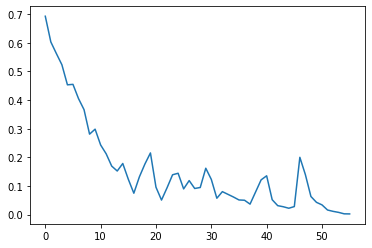

Epoch 1/100
22/22 - 5s - loss: 0.6765 - accuracy: 0.6108 - auc_1: 0.6407 - precision_1: 0.6071 - recall_1: 0.5500 - f1_score: 0.6513 - val_loss: 0.6715 - val_accuracy: 0.5949 - val_auc_1: 0.6231 - val_precision_1: 0.5714 - val_recall_1: 0.8000 - val_f1_score: 0.6723 - 5s/epoch - 239ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6168 - accuracy: 0.6747 - auc_1: 0.7235 - precision_1: 0.6773 - recall_1: 0.6235 - f1_score: 0.6513 - val_loss: 0.7256 - val_accuracy: 0.5570 - val_auc_1: 0.6109 - val_precision_1: 0.5352 - val_recall_1: 0.9500 - val_f1_score: 0.6723 - 1s/epoch - 58ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5720 - accuracy: 0.6960 - auc_1: 0.7692 - precision_1: 0.6981 - recall_1: 0.6529 - f1_score: 0.6513 - val_loss: 0.7448 - val_accuracy: 0.4937 - val_auc_1: 0.6096 - val_precision_1: 0.5000 - val_recall_1: 0.9750 - val_f1_score: 0.6723 - 1s/epoch - 58ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5462 - accuracy: 0.7259 - auc_1: 0.7930 - precision_1: 0.7194 - recall_1: 0.7088 - f1_score: 0.6

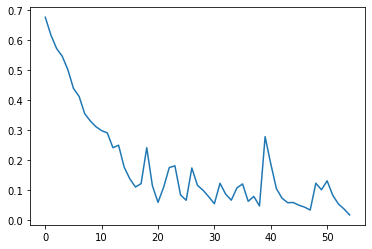

Epoch 1/100
22/22 - 5s - loss: 0.6989 - accuracy: 0.5767 - auc_2: 0.5948 - precision_2: 0.5559 - recall_2: 0.5090 - f1_score: 0.6409 - val_loss: 0.7349 - val_accuracy: 0.4430 - val_auc_2: 0.6267 - val_precision_2: 0.7000 - val_recall_2: 0.1458 - val_f1_score: 0.7559 - 5s/epoch - 234ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6222 - accuracy: 0.6605 - auc_2: 0.7158 - precision_2: 0.6515 - recall_2: 0.6024 - f1_score: 0.6409 - val_loss: 0.6375 - val_accuracy: 0.6076 - val_auc_2: 0.6710 - val_precision_2: 0.6809 - val_recall_2: 0.6667 - val_f1_score: 0.7559 - 1s/epoch - 68ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5848 - accuracy: 0.6861 - auc_2: 0.7553 - precision_2: 0.6785 - recall_2: 0.6355 - f1_score: 0.6409 - val_loss: 0.7298 - val_accuracy: 0.6076 - val_auc_2: 0.5874 - val_precision_2: 0.6076 - val_recall_2: 1.0000 - val_f1_score: 0.7559 - 1s/epoch - 58ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5617 - accuracy: 0.7301 - auc_2: 0.7831 - precision_2: 0.7126 - recall_2: 0.7169 - f1_score: 0.6

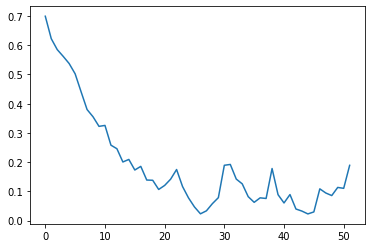

Epoch 1/100
23/23 - 6s - loss: 0.7056 - accuracy: 0.6099 - auc_3: 0.6284 - precision_3: 0.6124 - recall_3: 0.5465 - f1_score: 0.6559 - val_loss: 0.6798 - val_accuracy: 0.5513 - val_auc_3: 0.6733 - val_precision_3: 1.0000 - val_recall_3: 0.0278 - val_f1_score: 0.6316 - 6s/epoch - 256ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6181 - accuracy: 0.6567 - auc_3: 0.7163 - precision_3: 0.6700 - recall_3: 0.5843 - f1_score: 0.6559 - val_loss: 0.7439 - val_accuracy: 0.5769 - val_auc_3: 0.5949 - val_precision_3: 0.6667 - val_recall_3: 0.1667 - val_f1_score: 0.6316 - 1s/epoch - 57ms/step
Epoch 3/100
23/23 - 1s - loss: 0.5914 - accuracy: 0.6879 - auc_3: 0.7510 - precision_3: 0.6813 - recall_3: 0.6773 - f1_score: 0.6559 - val_loss: 0.8105 - val_accuracy: 0.4615 - val_auc_3: 0.5919 - val_precision_3: 0.4615 - val_recall_3: 1.0000 - val_f1_score: 0.6316 - 1s/epoch - 57ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5795 - accuracy: 0.6865 - auc_3: 0.7605 - precision_3: 0.6752 - recall_3: 0.6890 - f1_score: 0.6

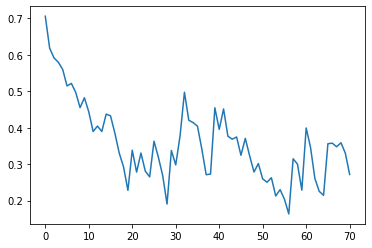

Epoch 1/100
23/23 - 6s - loss: 0.7009 - accuracy: 0.5858 - auc_4: 0.6151 - precision_4: 0.5853 - recall_4: 0.5686 - f1_score: 0.6635 - val_loss: 0.8216 - val_accuracy: 0.3974 - val_auc_4: 0.7139 - val_precision_4: 0.3896 - val_recall_4: 1.0000 - val_f1_score: 0.5556 - 6s/epoch - 247ms/step
Epoch 2/100
23/23 - 2s - loss: 0.6342 - accuracy: 0.6355 - auc_4: 0.6921 - precision_4: 0.6317 - recall_4: 0.6371 - f1_score: 0.6635 - val_loss: 0.6296 - val_accuracy: 0.6667 - val_auc_4: 0.6712 - val_precision_4: 0.7000 - val_recall_4: 0.2333 - val_f1_score: 0.5556 - 2s/epoch - 66ms/step
Epoch 3/100
23/23 - 1s - loss: 0.5980 - accuracy: 0.6596 - auc_4: 0.7442 - precision_4: 0.6657 - recall_4: 0.6314 - f1_score: 0.6635 - val_loss: 0.6388 - val_accuracy: 0.6410 - val_auc_4: 0.6674 - val_precision_4: 0.5714 - val_recall_4: 0.2667 - val_f1_score: 0.5556 - 1s/epoch - 57ms/step
Epoch 4/100
23/23 - 2s - loss: 0.5711 - accuracy: 0.7007 - auc_4: 0.7701 - precision_4: 0.7062 - recall_4: 0.6800 - f1_score: 0.6

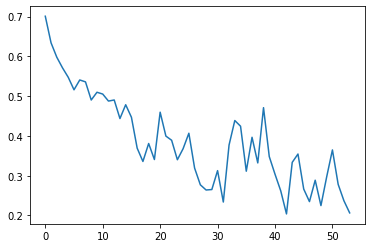

Epoch 1/100
23/23 - 6s - loss: 0.6949 - accuracy: 0.5773 - auc_5: 0.6132 - precision_5: 0.5745 - recall_5: 0.5347 - f1_score: 0.6584 - val_loss: 0.6493 - val_accuracy: 0.6154 - val_auc_5: 0.6922 - val_precision_5: 0.7000 - val_recall_5: 0.2059 - val_f1_score: 0.6071 - 6s/epoch - 279ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6272 - accuracy: 0.6624 - auc_5: 0.7056 - precision_5: 0.6731 - recall_5: 0.6069 - f1_score: 0.6584 - val_loss: 0.6981 - val_accuracy: 0.4872 - val_auc_5: 0.6989 - val_precision_5: 0.4571 - val_recall_5: 0.9412 - val_f1_score: 0.6071 - 1s/epoch - 59ms/step
Epoch 3/100
23/23 - 1s - loss: 0.5821 - accuracy: 0.6965 - auc_5: 0.7588 - precision_5: 0.7025 - recall_5: 0.6618 - f1_score: 0.6584 - val_loss: 0.6966 - val_accuracy: 0.5513 - val_auc_5: 0.6477 - val_precision_5: 0.3333 - val_recall_5: 0.0294 - val_f1_score: 0.6071 - 1s/epoch - 57ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5633 - accuracy: 0.7149 - auc_5: 0.7818 - precision_5: 0.7259 - recall_5: 0.6734 - f1_score: 0.6

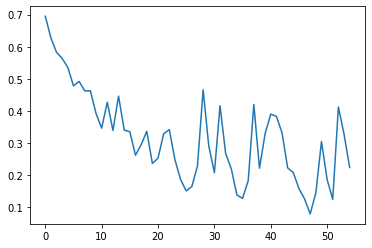

Epoch 1/100
23/23 - 6s - loss: 0.7277 - accuracy: 0.5773 - auc_6: 0.6034 - precision_6: 0.5710 - recall_6: 0.5277 - f1_score: 0.6546 - val_loss: 0.7741 - val_accuracy: 0.5256 - val_auc_6: 0.4489 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_f1_score: 0.6435 - 6s/epoch - 242ms/step
Epoch 2/100
23/23 - 2s - loss: 0.6372 - accuracy: 0.6553 - auc_6: 0.6966 - precision_6: 0.6880 - recall_6: 0.5335 - f1_score: 0.6546 - val_loss: 0.6913 - val_accuracy: 0.5513 - val_auc_6: 0.7307 - val_precision_6: 1.0000 - val_recall_6: 0.0541 - val_f1_score: 0.6435 - 2s/epoch - 67ms/step
Epoch 3/100
23/23 - 1s - loss: 0.6013 - accuracy: 0.6894 - auc_6: 0.7409 - precision_6: 0.7109 - recall_6: 0.6093 - f1_score: 0.6546 - val_loss: 0.9602 - val_accuracy: 0.4744 - val_auc_6: 0.6898 - val_precision_6: 0.4744 - val_recall_6: 1.0000 - val_f1_score: 0.6435 - 1s/epoch - 57ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5568 - accuracy: 0.7262 - auc_6: 0.7897 - precision_6: 0.7287 - recall_6: 0.6968 - f1_sc

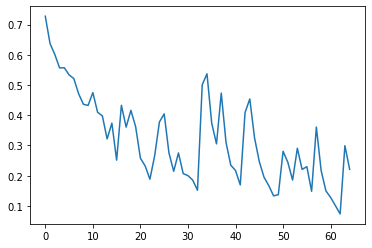

Epoch 1/100
23/23 - 6s - loss: 0.6786 - accuracy: 0.6128 - auc_7: 0.6337 - precision_7: 0.6025 - recall_7: 0.5651 - f1_score: 0.6481 - val_loss: 0.7811 - val_accuracy: 0.4615 - val_auc_7: 0.6336 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_f1_score: 0.7000 - 6s/epoch - 241ms/step
Epoch 2/100
23/23 - 2s - loss: 0.5995 - accuracy: 0.6823 - auc_7: 0.7390 - precision_7: 0.6979 - recall_7: 0.5947 - f1_score: 0.6481 - val_loss: 0.7720 - val_accuracy: 0.5000 - val_auc_7: 0.6432 - val_precision_7: 1.0000 - val_recall_7: 0.0714 - val_f1_score: 0.7000 - 2s/epoch - 67ms/step
Epoch 3/100
23/23 - 2s - loss: 0.5591 - accuracy: 0.7092 - auc_7: 0.7840 - precision_7: 0.7138 - recall_7: 0.6568 - f1_score: 0.6481 - val_loss: 0.7408 - val_accuracy: 0.4487 - val_auc_7: 0.6412 - val_precision_7: 0.3333 - val_recall_7: 0.0238 - val_f1_score: 0.7000 - 2s/epoch - 67ms/step
Epoch 4/100
23/23 - 2s - loss: 0.5534 - accuracy: 0.7206 - auc_7: 0.7901 - precision_7: 0.7374 - recall_7: 0.6479 - f1_sc

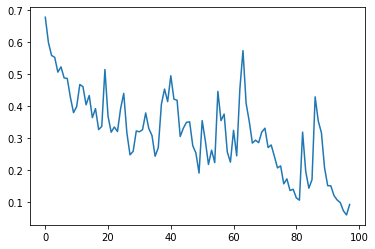

Epoch 1/100
23/23 - 6s - loss: 0.7105 - accuracy: 0.5617 - auc_8: 0.5760 - precision_8: 0.5528 - recall_8: 0.4631 - f1_score: 0.6494 - val_loss: 0.6718 - val_accuracy: 0.5385 - val_auc_8: 0.6496 - val_precision_8: 0.5410 - val_recall_8: 0.8049 - val_f1_score: 0.6891 - 6s/epoch - 248ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6223 - accuracy: 0.6610 - auc_8: 0.7094 - precision_8: 0.6582 - recall_8: 0.6136 - f1_score: 0.6494 - val_loss: 0.7953 - val_accuracy: 0.4744 - val_auc_8: 0.5712 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - val_f1_score: 0.6891 - 1s/epoch - 57ms/step
Epoch 3/100
23/23 - 1s - loss: 0.6047 - accuracy: 0.6596 - auc_8: 0.7393 - precision_8: 0.6787 - recall_8: 0.5546 - f1_score: 0.6494 - val_loss: 0.6759 - val_accuracy: 0.6026 - val_auc_8: 0.6477 - val_precision_8: 0.6136 - val_recall_8: 0.6585 - val_f1_score: 0.6891 - 1s/epoch - 58ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5881 - accuracy: 0.6695 - auc_8: 0.7525 - precision_8: 0.6699 - recall_8: 0.6165 - f1_sc

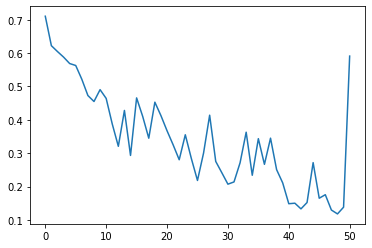

Epoch 1/100
23/23 - 6s - loss: 0.6829 - accuracy: 0.5688 - auc_9: 0.6131 - precision_9: 0.5632 - recall_9: 0.5632 - f1_score: 0.6610 - val_loss: 0.6729 - val_accuracy: 0.5897 - val_auc_9: 0.6396 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00 - val_f1_score: 0.5818 - 6s/epoch - 249ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6129 - accuracy: 0.6652 - auc_9: 0.7268 - precision_9: 0.6818 - recall_9: 0.6034 - f1_score: 0.6610 - val_loss: 0.8222 - val_accuracy: 0.4487 - val_auc_9: 0.7143 - val_precision_9: 0.4225 - val_recall_9: 0.9375 - val_f1_score: 0.5818 - 1s/epoch - 57ms/step
Epoch 3/100
23/23 - 1s - loss: 0.5743 - accuracy: 0.7064 - auc_9: 0.7720 - precision_9: 0.6870 - recall_9: 0.7443 - f1_score: 0.6610 - val_loss: 0.8106 - val_accuracy: 0.5897 - val_auc_9: 0.7391 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00 - val_f1_score: 0.5818 - 1s/epoch - 57ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5861 - accuracy: 0.6965 - auc_9: 0.7580 - precision_9: 0.7055 - recall_9: 0.6609

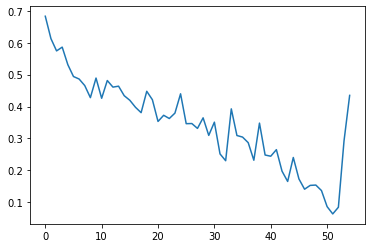

In [5]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_body_model = CNNLSTM(n_features, None, n_length, n_outputs)
    history = cnnlstm_binary_body_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        cnnlstm_binary_body_model.save(model_path / 'body_binary_cnnlstm.h5')

#### Training performance

In [6]:
body_cnnlstm_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
body_cnnlstm_train_results

{'Accuracy': 0.9046693682670593,
 'ROC/AUC': 0.9559859216213227,
 'Precision': 0.9006429374217987,
 'Recall': 0.9045458495616913,
 'F1-score': 0.653450357913971}

#### Validation performance

In [7]:
body_cnnlstm_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
body_cnnlstm_val_results

{'Accuracy': 0.6552742749452591,
 'ROC/AUC': 0.7165073990821839,
 'Precision': 0.6649566411972045,
 'Recall': 0.644359427690506,
 'F1-score': 0.6509092807769775}

#### Predictions and performance on test set

In [8]:
cnnlstm_binary_body_model = load_model(model_path / 'body_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_body_model.predict(X_test)
_, acc, auc, precision, recall, f1 = cnnlstm_binary_body_model.evaluate(X_test, y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 1s 14ms/step - loss: 0.7996 - accuracy: 0.5584 - auc_9: 0.6709 - precision_9: 0.9254 - recall_9: 0.5277 - f1_score: 0.9234
Accuracy: 55.84% 
ROC/AUC: 0.67 
Precision: 0.93 
Recall: 0.53 
F1 score: 0.92


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

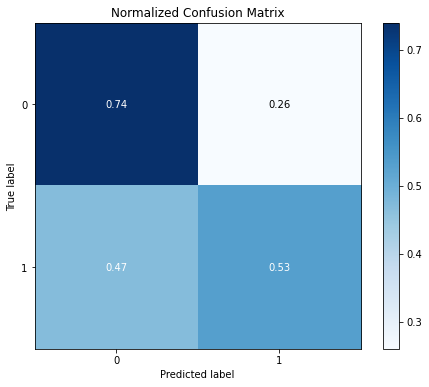

In [9]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

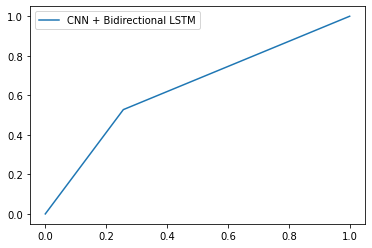

In [10]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='CNN + Bidirectional LSTM')
plt.legend()
plt.show()

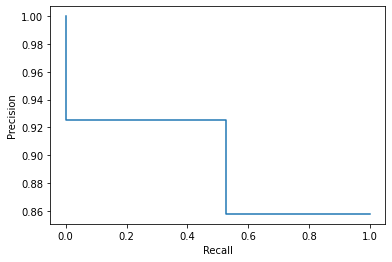

In [11]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### 1.2 RCNN

Epoch 1/100
29/29 - 3s - loss: 0.7731 - accuracy: 0.5909 - auc_10: 0.6178 - precision_10: 0.5774 - recall_10: 0.5706 - f1_score: 0.6513 - val_loss: 2.2774 - val_accuracy: 0.4937 - val_auc_10: 0.5356 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00 - val_f1_score: 0.6723 - 3s/epoch - 93ms/step
Epoch 2/100
29/29 - 1s - loss: 0.6668 - accuracy: 0.6065 - auc_10: 0.6613 - precision_10: 0.6013 - recall_10: 0.5500 - f1_score: 0.6513 - val_loss: 0.7142 - val_accuracy: 0.6076 - val_auc_10: 0.6888 - val_precision_10: 0.5882 - val_recall_10: 0.7500 - val_f1_score: 0.6723 - 582ms/epoch - 20ms/step
Epoch 3/100
29/29 - 1s - loss: 0.6303 - accuracy: 0.6463 - auc_10: 0.7120 - precision_10: 0.6463 - recall_10: 0.5912 - f1_score: 0.6513 - val_loss: 0.8097 - val_accuracy: 0.6076 - val_auc_10: 0.6381 - val_precision_10: 0.6800 - val_recall_10: 0.4250 - val_f1_score: 0.6723 - 585ms/epoch - 20ms/step
Epoch 4/100
29/29 - 1s - loss: 0.6009 - accuracy: 0.6889 - auc_10: 0.7428 - precision_10: 0.6945 -

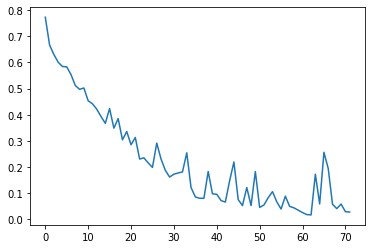

Epoch 1/100
29/29 - 2s - loss: 0.7863 - accuracy: 0.6065 - auc_11: 0.6211 - precision_11: 0.5940 - recall_11: 0.5853 - f1_score: 0.6513 - val_loss: 9.3740 - val_accuracy: 0.5063 - val_auc_11: 0.5000 - val_precision_11: 0.5063 - val_recall_11: 1.0000 - val_f1_score: 0.6723 - 2s/epoch - 85ms/step
Epoch 2/100
29/29 - 1s - loss: 0.6444 - accuracy: 0.6534 - auc_11: 0.7049 - precision_11: 0.6455 - recall_11: 0.6265 - f1_score: 0.6513 - val_loss: 3.3113 - val_accuracy: 0.5063 - val_auc_11: 0.5558 - val_precision_11: 0.5063 - val_recall_11: 1.0000 - val_f1_score: 0.6723 - 590ms/epoch - 20ms/step
Epoch 3/100
29/29 - 1s - loss: 0.6058 - accuracy: 0.6960 - auc_11: 0.7434 - precision_11: 0.6957 - recall_11: 0.6588 - f1_score: 0.6513 - val_loss: 3.8868 - val_accuracy: 0.5063 - val_auc_11: 0.5413 - val_precision_11: 0.5063 - val_recall_11: 1.0000 - val_f1_score: 0.6723 - 569ms/epoch - 20ms/step
Epoch 4/100
29/29 - 1s - loss: 0.5744 - accuracy: 0.7003 - auc_11: 0.7735 - precision_11: 0.7022 - recall_

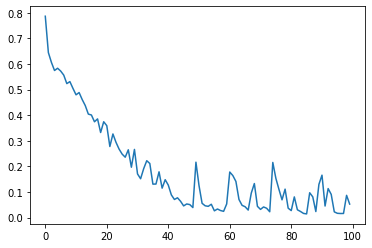

Epoch 1/100
29/29 - 2s - loss: 0.7676 - accuracy: 0.5838 - auc_12: 0.5969 - precision_12: 0.5661 - recall_12: 0.5030 - f1_score: 0.6409 - val_loss: 1.2613 - val_accuracy: 0.5949 - val_auc_12: 0.7362 - val_precision_12: 0.6026 - val_recall_12: 0.9792 - val_f1_score: 0.7559 - 2s/epoch - 86ms/step
Epoch 2/100
29/29 - 1s - loss: 0.6410 - accuracy: 0.6520 - auc_12: 0.6953 - precision_12: 0.6436 - recall_12: 0.5873 - f1_score: 0.6409 - val_loss: 5.9976 - val_accuracy: 0.3924 - val_auc_12: 0.5000 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - val_f1_score: 0.7559 - 584ms/epoch - 20ms/step
Epoch 3/100
29/29 - 1s - loss: 0.6258 - accuracy: 0.6634 - auc_12: 0.7149 - precision_12: 0.6690 - recall_12: 0.5663 - f1_score: 0.6409 - val_loss: 0.6633 - val_accuracy: 0.7215 - val_auc_12: 0.7490 - val_precision_12: 0.7407 - val_recall_12: 0.8333 - val_f1_score: 0.7559 - 600ms/epoch - 21ms/step
Epoch 4/100
29/29 - 1s - loss: 0.6090 - accuracy: 0.6776 - auc_12: 0.7356 - precision_12: 0.6744 -

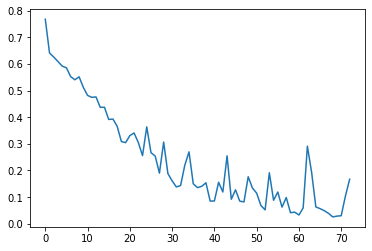

Epoch 1/100
29/29 - 3s - loss: 0.7613 - accuracy: 0.6014 - auc_13: 0.6203 - precision_13: 0.5908 - recall_13: 0.5959 - f1_score: 0.6559 - val_loss: 6.1371 - val_accuracy: 0.4615 - val_auc_13: 0.5000 - val_precision_13: 0.4615 - val_recall_13: 1.0000 - val_f1_score: 0.6316 - 3s/epoch - 87ms/step
Epoch 2/100
29/29 - 1s - loss: 0.6279 - accuracy: 0.6652 - auc_13: 0.7070 - precision_13: 0.6824 - recall_13: 0.5872 - f1_score: 0.6559 - val_loss: 1.0843 - val_accuracy: 0.5128 - val_auc_13: 0.6058 - val_precision_13: 0.4815 - val_recall_13: 0.7222 - val_f1_score: 0.6316 - 533ms/epoch - 18ms/step
Epoch 3/100
29/29 - 1s - loss: 0.6044 - accuracy: 0.6894 - auc_13: 0.7434 - precision_13: 0.6877 - recall_13: 0.6657 - f1_score: 0.6559 - val_loss: 7.0238 - val_accuracy: 0.4615 - val_auc_13: 0.5000 - val_precision_13: 0.4615 - val_recall_13: 1.0000 - val_f1_score: 0.6316 - 508ms/epoch - 18ms/step
Epoch 4/100
29/29 - 1s - loss: 0.5920 - accuracy: 0.6965 - auc_13: 0.7589 - precision_13: 0.6879 - recall_

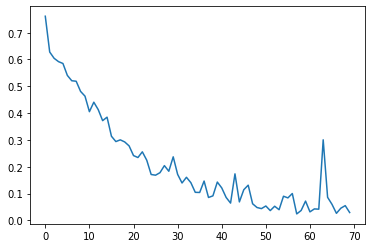

Epoch 1/100
29/29 - 2s - loss: 0.7610 - accuracy: 0.5773 - auc_14: 0.6161 - precision_14: 0.5788 - recall_14: 0.5457 - f1_score: 0.6635 - val_loss: 2.4783 - val_accuracy: 0.6154 - val_auc_14: 0.5066 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00 - val_f1_score: 0.5556 - 2s/epoch - 80ms/step
Epoch 2/100
29/29 - 1s - loss: 0.6451 - accuracy: 0.6624 - auc_14: 0.6996 - precision_14: 0.6750 - recall_14: 0.6171 - f1_score: 0.6635 - val_loss: 0.8096 - val_accuracy: 0.5897 - val_auc_14: 0.6274 - val_precision_14: 0.3333 - val_recall_14: 0.0667 - val_f1_score: 0.5556 - 549ms/epoch - 19ms/step
Epoch 3/100
29/29 - 1s - loss: 0.6157 - accuracy: 0.6709 - auc_14: 0.7225 - precision_14: 0.6821 - recall_14: 0.6314 - f1_score: 0.6635 - val_loss: 5.4161 - val_accuracy: 0.3846 - val_auc_14: 0.5135 - val_precision_14: 0.3846 - val_recall_14: 1.0000 - val_f1_score: 0.5556 - 527ms/epoch - 18ms/step
Epoch 4/100
29/29 - 1s - loss: 0.6043 - accuracy: 0.6794 - auc_14: 0.7414 - precision_14: 0.6771 -

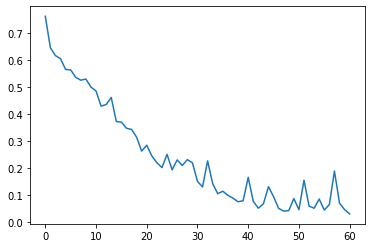

Epoch 1/100
29/29 - 2s - loss: 0.7839 - accuracy: 0.5915 - auc_15: 0.6068 - precision_15: 0.5895 - recall_15: 0.5520 - f1_score: 0.6584 - val_loss: 0.9976 - val_accuracy: 0.5897 - val_auc_15: 0.5495 - val_precision_15: 0.5357 - val_recall_15: 0.4412 - val_f1_score: 0.6071 - 2s/epoch - 81ms/step
Epoch 2/100
29/29 - 1s - loss: 0.6420 - accuracy: 0.6582 - auc_15: 0.7030 - precision_15: 0.6606 - recall_15: 0.6243 - f1_score: 0.6584 - val_loss: 5.8363 - val_accuracy: 0.4359 - val_auc_15: 0.5114 - val_precision_15: 0.4359 - val_recall_15: 1.0000 - val_f1_score: 0.6071 - 536ms/epoch - 18ms/step
Epoch 3/100
29/29 - 1s - loss: 0.6366 - accuracy: 0.6596 - auc_15: 0.7123 - precision_15: 0.6596 - recall_15: 0.6329 - f1_score: 0.6584 - val_loss: 3.1973 - val_accuracy: 0.4359 - val_auc_15: 0.6624 - val_precision_15: 0.4359 - val_recall_15: 1.0000 - val_f1_score: 0.6071 - 524ms/epoch - 18ms/step
Epoch 4/100
29/29 - 1s - loss: 0.5777 - accuracy: 0.6936 - auc_15: 0.7710 - precision_15: 0.6982 - recall_

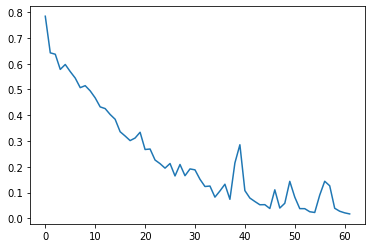

Epoch 1/100
29/29 - 3s - loss: 0.7561 - accuracy: 0.6468 - auc_16: 0.6492 - precision_16: 0.6424 - recall_16: 0.6181 - f1_score: 0.6546 - val_loss: 12.1428 - val_accuracy: 0.4744 - val_auc_16: 0.5000 - val_precision_16: 0.4744 - val_recall_16: 1.0000 - val_f1_score: 0.6435 - 3s/epoch - 89ms/step
Epoch 2/100
29/29 - 1s - loss: 0.6380 - accuracy: 0.6397 - auc_16: 0.7025 - precision_16: 0.6369 - recall_16: 0.6035 - f1_score: 0.6546 - val_loss: 6.3796 - val_accuracy: 0.4744 - val_auc_16: 0.5122 - val_precision_16: 0.4744 - val_recall_16: 1.0000 - val_f1_score: 0.6435 - 548ms/epoch - 19ms/step
Epoch 3/100
29/29 - 1s - loss: 0.6126 - accuracy: 0.6766 - auc_16: 0.7373 - precision_16: 0.6696 - recall_16: 0.6618 - f1_score: 0.6546 - val_loss: 1.4514 - val_accuracy: 0.5128 - val_auc_16: 0.7472 - val_precision_16: 0.4933 - val_recall_16: 1.0000 - val_f1_score: 0.6435 - 537ms/epoch - 19ms/step
Epoch 4/100
29/29 - 1s - loss: 0.6095 - accuracy: 0.6582 - auc_16: 0.7310 - precision_16: 0.6564 - recall

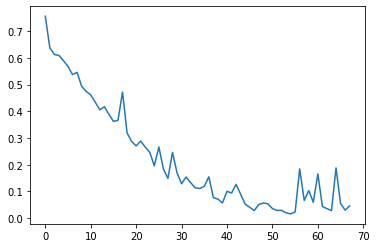

Epoch 1/100
29/29 - 2s - loss: 0.7812 - accuracy: 0.5830 - auc_17: 0.5974 - precision_17: 0.5692 - recall_17: 0.5355 - f1_score: 0.6481 - val_loss: 1.9568 - val_accuracy: 0.5256 - val_auc_17: 0.6124 - val_precision_17: 0.5325 - val_recall_17: 0.9762 - val_f1_score: 0.7000 - 2s/epoch - 79ms/step
Epoch 2/100
29/29 - 1s - loss: 0.6457 - accuracy: 0.6383 - auc_17: 0.6984 - precision_17: 0.6397 - recall_17: 0.5621 - f1_score: 0.6481 - val_loss: 2.5452 - val_accuracy: 0.5385 - val_auc_17: 0.6009 - val_precision_17: 0.5385 - val_recall_17: 1.0000 - val_f1_score: 0.7000 - 530ms/epoch - 18ms/step
Epoch 3/100
29/29 - 1s - loss: 0.5992 - accuracy: 0.6809 - auc_17: 0.7461 - precision_17: 0.6697 - recall_17: 0.6598 - f1_score: 0.6481 - val_loss: 1.9137 - val_accuracy: 0.5385 - val_auc_17: 0.6111 - val_precision_17: 0.5385 - val_recall_17: 1.0000 - val_f1_score: 0.7000 - 538ms/epoch - 19ms/step
Epoch 4/100
29/29 - 1s - loss: 0.5789 - accuracy: 0.7206 - auc_17: 0.7709 - precision_17: 0.7156 - recall_

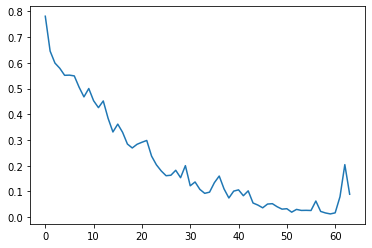

Epoch 1/100
29/29 - 2s - loss: 0.7812 - accuracy: 0.5943 - auc_18: 0.6283 - precision_18: 0.5841 - recall_18: 0.5428 - f1_score: 0.6494 - val_loss: 10.5258 - val_accuracy: 0.5256 - val_auc_18: 0.5000 - val_precision_18: 0.5256 - val_recall_18: 1.0000 - val_f1_score: 0.6891 - 2s/epoch - 80ms/step
Epoch 2/100
29/29 - 1s - loss: 0.6530 - accuracy: 0.6468 - auc_18: 0.6969 - precision_18: 0.6424 - recall_18: 0.5988 - f1_score: 0.6494 - val_loss: 6.5340 - val_accuracy: 0.5256 - val_auc_18: 0.5000 - val_precision_18: 0.5256 - val_recall_18: 1.0000 - val_f1_score: 0.6891 - 547ms/epoch - 19ms/step
Epoch 3/100
29/29 - 1s - loss: 0.6016 - accuracy: 0.6780 - auc_18: 0.7382 - precision_18: 0.6783 - recall_18: 0.6283 - f1_score: 0.6494 - val_loss: 2.4454 - val_accuracy: 0.5256 - val_auc_18: 0.6124 - val_precision_18: 0.5256 - val_recall_18: 1.0000 - val_f1_score: 0.6891 - 539ms/epoch - 19ms/step
Epoch 4/100
29/29 - 1s - loss: 0.5720 - accuracy: 0.7050 - auc_18: 0.7698 - precision_18: 0.7093 - recall

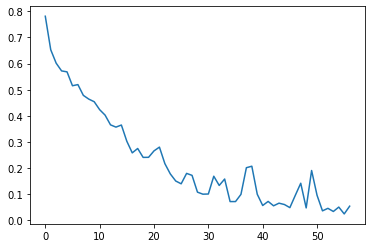

Epoch 1/100
29/29 - 3s - loss: 0.7630 - accuracy: 0.5929 - auc_19: 0.6141 - precision_19: 0.5938 - recall_19: 0.5546 - f1_score: 0.6610 - val_loss: 16.1663 - val_accuracy: 0.4103 - val_auc_19: 0.5000 - val_precision_19: 0.4103 - val_recall_19: 1.0000 - val_f1_score: 0.5818 - 3s/epoch - 89ms/step
Epoch 2/100
29/29 - 1s - loss: 0.6373 - accuracy: 0.6596 - auc_19: 0.7073 - precision_19: 0.6534 - recall_19: 0.6609 - f1_score: 0.6610 - val_loss: 6.7412 - val_accuracy: 0.4103 - val_auc_19: 0.5000 - val_precision_19: 0.4103 - val_recall_19: 1.0000 - val_f1_score: 0.5818 - 552ms/epoch - 19ms/step
Epoch 3/100
29/29 - 1s - loss: 0.6069 - accuracy: 0.6851 - auc_19: 0.7426 - precision_19: 0.6898 - recall_19: 0.6580 - f1_score: 0.6610 - val_loss: 1.5792 - val_accuracy: 0.4872 - val_auc_19: 0.6651 - val_precision_19: 0.4429 - val_recall_19: 0.9688 - val_f1_score: 0.5818 - 536ms/epoch - 18ms/step
Epoch 4/100
29/29 - 1s - loss: 0.5703 - accuracy: 0.6936 - auc_19: 0.7744 - precision_19: 0.7012 - recall

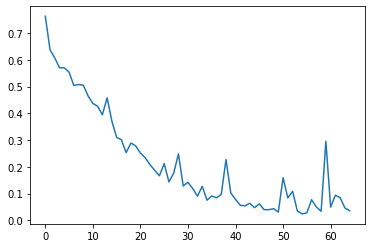

In [12]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rcnn_binary_body_model = RCNN(n_features, None, n_length, n_outputs)
    history = rcnn_binary_body_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=25)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        rcnn_binary_body_model.save(model_path / 'body_binary_rcnn.h5')

#### Training performance

In [13]:
body_rcnn_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
body_rcnn_train_results

{'Accuracy': 0.9829678416252137,
 'ROC/AUC': 0.997336483001709,
 'Precision': 0.9817791402339935,
 'Recall': 0.982866770029068,
 'F1-score': 0.653450357913971}

#### Validation performance

In [14]:
body_rcnn_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
body_rcnn_val_results

{'Accuracy': 0.6537001013755799,
 'ROC/AUC': 0.7402033984661103,
 'Precision': 0.632928192615509,
 'Recall': 0.7339869290590286,
 'F1-score': 0.6514790058135986}

#### Predictions and performance on test set

In [15]:
rcnn_binary_body_model = load_model(model_path / 'body_binary_rcnn.h5')
y_pred = rcnn_binary_body_model.predict(X_test)
_, acc, auc, precision, recall, f1 = rcnn_binary_body_model.evaluate(X_test, y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 0s 7ms/step - loss: 0.9721 - accuracy: 0.4964 - auc_10: 0.6184 - precision_10: 0.8943 - recall_10: 0.4681 - f1_score: 0.9234
Accuracy: 49.64% 
ROC/AUC: 0.62 
Precision: 0.89 
Recall: 0.47 
F1 score: 0.92


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

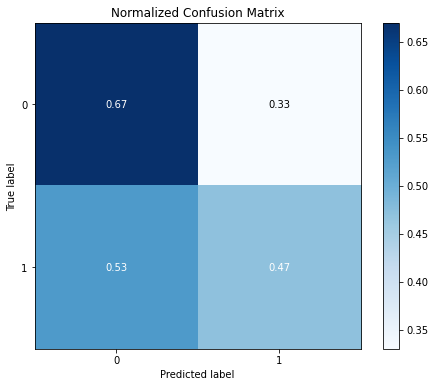

In [16]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

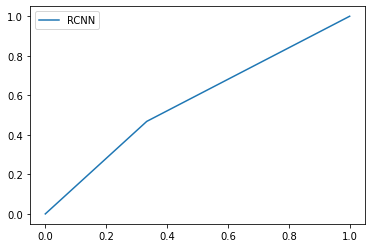

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='RCNN')
plt.legend()
plt.show()

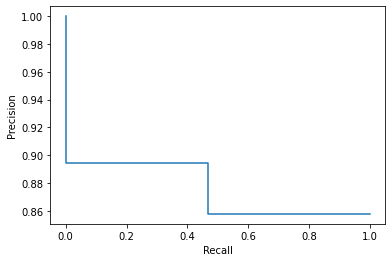

In [18]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

## 2. Unimodal Face (Facial Expression + Head Pose)

In [19]:
X_train, X_test, y_train, y_test = load_dataset('AUs', binary=True)
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[2], X_train.shape[-1], y_train.shape[1]

(752, 1, 350, 25) (752, 1)
(268, 1, 350, 25) (268, 1)


### 2.1 CNN + BiLSTM

Epoch 1/100
22/22 - 5s - loss: 0.6891 - accuracy: 0.6006 - auc_20: 0.6133 - precision_20: 0.5857 - recall_20: 0.5785 - f1_score: 0.6494 - val_loss: 0.6902 - val_accuracy: 0.5395 - val_auc_20: 0.5516 - val_precision_20: 0.5395 - val_recall_20: 1.0000 - val_f1_score: 0.7009 - 5s/epoch - 248ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6310 - accuracy: 0.6583 - auc_20: 0.7074 - precision_20: 0.6416 - recall_20: 0.6554 - f1_score: 0.6494 - val_loss: 0.6752 - val_accuracy: 0.5789 - val_auc_20: 0.6700 - val_precision_20: 0.6667 - val_recall_20: 0.4390 - val_f1_score: 0.7009 - 1s/epoch - 61ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5780 - accuracy: 0.7041 - auc_20: 0.7641 - precision_20: 0.7036 - recall_20: 0.6646 - f1_score: 0.6494 - val_loss: 0.6962 - val_accuracy: 0.5395 - val_auc_20: 0.5976 - val_precision_20: 0.5395 - val_recall_20: 1.0000 - val_f1_score: 0.7009 - 1s/epoch - 52ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5436 - accuracy: 0.7308 - auc_20: 0.7998 - precision_20: 0.7134 - recall_20: 0

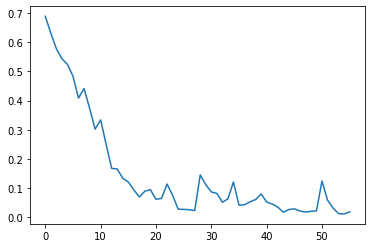

Epoch 1/100
22/22 - 5s - loss: 0.6895 - accuracy: 0.5843 - auc_21: 0.6146 - precision_21: 0.5686 - recall_21: 0.5387 - f1_score: 0.6466 - val_loss: 0.6617 - val_accuracy: 0.5658 - val_auc_21: 0.7266 - val_precision_21: 0.5658 - val_recall_21: 1.0000 - val_f1_score: 0.7227 - 5s/epoch - 247ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6420 - accuracy: 0.6361 - auc_21: 0.6818 - precision_21: 0.6163 - recall_21: 0.6316 - f1_score: 0.6466 - val_loss: 0.7266 - val_accuracy: 0.4605 - val_auc_21: 0.5176 - val_precision_21: 1.0000 - val_recall_21: 0.0465 - val_f1_score: 0.7227 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6316 - accuracy: 0.6849 - auc_21: 0.7115 - precision_21: 0.6797 - recall_21: 0.6440 - f1_score: 0.6466 - val_loss: 0.6411 - val_accuracy: 0.6447 - val_auc_21: 0.7805 - val_precision_21: 0.9444 - val_recall_21: 0.3953 - val_f1_score: 0.7227 - 1s/epoch - 67ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5994 - accuracy: 0.6805 - auc_21: 0.7391 - precision_21: 0.6838 - recall_21: 0

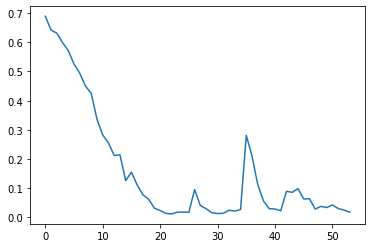

Epoch 1/100
22/22 - 6s - loss: 0.7010 - accuracy: 0.5805 - auc_22: 0.5996 - precision_22: 0.5833 - recall_22: 0.5060 - f1_score: 0.6581 - val_loss: 0.6422 - val_accuracy: 0.6533 - val_auc_22: 0.7281 - val_precision_22: 0.7500 - val_recall_22: 0.3529 - val_f1_score: 0.6239 - 6s/epoch - 260ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6243 - accuracy: 0.6662 - auc_22: 0.7080 - precision_22: 0.6710 - recall_22: 0.6265 - f1_score: 0.6581 - val_loss: 0.8213 - val_accuracy: 0.5333 - val_auc_22: 0.5646 - val_precision_22: 0.4915 - val_recall_22: 0.8529 - val_f1_score: 0.6239 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6023 - accuracy: 0.6617 - auc_22: 0.7329 - precision_22: 0.6625 - recall_22: 0.6325 - f1_score: 0.6581 - val_loss: 0.8954 - val_accuracy: 0.4533 - val_auc_22: 0.6072 - val_precision_22: 0.4533 - val_recall_22: 1.0000 - val_f1_score: 0.6239 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5792 - accuracy: 0.6809 - auc_22: 0.7601 - precision_22: 0.6686 - recall_22: 0

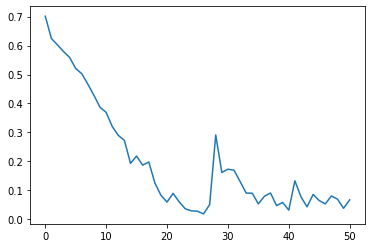

Epoch 1/100
22/22 - 6s - loss: 0.7031 - accuracy: 0.6012 - auc_23: 0.6186 - precision_23: 0.6014 - recall_23: 0.5244 - f1_score: 0.6527 - val_loss: 0.6652 - val_accuracy: 0.6000 - val_auc_23: 0.6465 - val_precision_23: 0.6250 - val_recall_23: 0.5263 - val_f1_score: 0.6726 - 6s/epoch - 258ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6345 - accuracy: 0.6455 - auc_23: 0.6944 - precision_23: 0.6517 - recall_23: 0.5762 - f1_score: 0.6527 - val_loss: 0.7094 - val_accuracy: 0.5067 - val_auc_23: 0.6732 - val_precision_23: 0.5067 - val_recall_23: 1.0000 - val_f1_score: 0.6726 - 1s/epoch - 58ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5986 - accuracy: 0.6854 - auc_23: 0.7405 - precision_23: 0.6706 - recall_23: 0.6890 - f1_score: 0.6527 - val_loss: 0.7073 - val_accuracy: 0.5333 - val_auc_23: 0.5231 - val_precision_23: 0.6667 - val_recall_23: 0.1579 - val_f1_score: 0.6726 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5556 - accuracy: 0.7016 - auc_23: 0.7859 - precision_23: 0.6994 - recall_23: 0

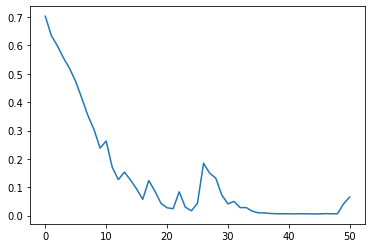

Epoch 1/100
22/22 - 5s - loss: 0.6912 - accuracy: 0.5790 - auc_24: 0.6120 - precision_24: 0.5814 - recall_24: 0.5240 - f1_score: 0.6607 - val_loss: 0.7040 - val_accuracy: 0.4933 - val_auc_24: 0.4666 - val_precision_24: 0.4348 - val_recall_24: 0.6250 - val_f1_score: 0.5981 - 5s/epoch - 248ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6204 - accuracy: 0.6396 - auc_24: 0.7074 - precision_24: 0.6243 - recall_24: 0.6766 - f1_score: 0.6607 - val_loss: 0.7340 - val_accuracy: 0.4400 - val_auc_24: 0.5265 - val_precision_24: 0.4107 - val_recall_24: 0.7188 - val_f1_score: 0.5981 - 1s/epoch - 58ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5853 - accuracy: 0.6809 - auc_24: 0.7516 - precision_24: 0.6639 - recall_24: 0.7156 - f1_score: 0.6607 - val_loss: 0.7583 - val_accuracy: 0.4800 - val_auc_24: 0.4771 - val_precision_24: 0.4255 - val_recall_24: 0.6250 - val_f1_score: 0.5981 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5510 - accuracy: 0.7046 - auc_24: 0.7855 - precision_24: 0.6914 - recall_24: 0

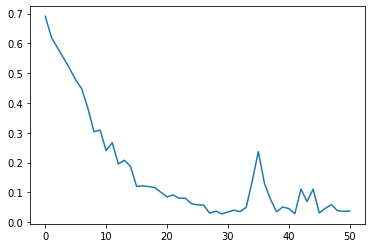

Epoch 1/100
22/22 - 6s - loss: 0.6923 - accuracy: 0.6071 - auc_25: 0.6302 - precision_25: 0.6040 - recall_25: 0.5562 - f1_score: 0.6541 - val_loss: 0.7484 - val_accuracy: 0.4933 - val_auc_25: 0.4879 - val_precision_25: 0.4933 - val_recall_25: 1.0000 - val_f1_score: 0.6607 - 6s/epoch - 264ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6487 - accuracy: 0.6322 - auc_25: 0.6729 - precision_25: 0.6117 - recall_25: 0.6657 - f1_score: 0.6541 - val_loss: 0.7468 - val_accuracy: 0.4933 - val_auc_25: 0.7429 - val_precision_25: 0.4933 - val_recall_25: 1.0000 - val_f1_score: 0.6607 - 1s/epoch - 67ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5951 - accuracy: 0.6839 - auc_25: 0.7466 - precision_25: 0.6558 - recall_25: 0.7356 - f1_score: 0.6541 - val_loss: 0.6200 - val_accuracy: 0.6933 - val_auc_25: 0.7607 - val_precision_25: 0.6750 - val_recall_25: 0.7297 - val_f1_score: 0.6607 - 1s/epoch - 68ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5539 - accuracy: 0.7194 - auc_25: 0.7929 - precision_25: 0.7087 - recall_25: 0

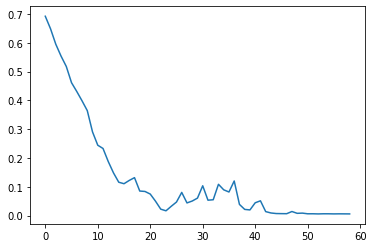

Epoch 1/100
22/22 - 6s - loss: 0.7018 - accuracy: 0.5820 - auc_26: 0.5971 - precision_26: 0.5825 - recall_26: 0.5211 - f1_score: 0.6581 - val_loss: 0.6893 - val_accuracy: 0.5467 - val_auc_26: 0.6295 - val_precision_26: 0.5000 - val_recall_26: 0.0294 - val_f1_score: 0.6239 - 6s/epoch - 258ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6301 - accuracy: 0.6603 - auc_26: 0.7097 - precision_26: 0.6835 - recall_26: 0.5723 - f1_score: 0.6581 - val_loss: 0.7642 - val_accuracy: 0.4800 - val_auc_26: 0.6804 - val_precision_26: 0.4658 - val_recall_26: 1.0000 - val_f1_score: 0.6239 - 1s/epoch - 58ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6090 - accuracy: 0.6484 - auc_26: 0.7249 - precision_26: 0.6506 - recall_26: 0.6114 - f1_score: 0.6581 - val_loss: 0.6622 - val_accuracy: 0.5867 - val_auc_26: 0.6399 - val_precision_26: 0.5385 - val_recall_26: 0.6176 - val_f1_score: 0.6239 - 1s/epoch - 68ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5761 - accuracy: 0.6987 - auc_26: 0.7671 - precision_26: 0.6963 - recall_26: 0

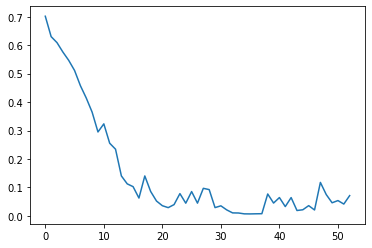

Epoch 1/100
22/22 - 5s - loss: 0.6842 - accuracy: 0.6056 - auc_27: 0.6374 - precision_27: 0.6019 - recall_27: 0.5710 - f1_score: 0.6567 - val_loss: 0.6930 - val_accuracy: 0.5867 - val_auc_27: 0.5975 - val_precision_27: 0.5385 - val_recall_27: 0.8000 - val_f1_score: 0.6364 - 5s/epoch - 249ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6076 - accuracy: 0.6662 - auc_27: 0.7278 - precision_27: 0.6577 - recall_27: 0.6616 - f1_score: 0.6567 - val_loss: 0.7068 - val_accuracy: 0.6000 - val_auc_27: 0.6332 - val_precision_27: 0.5532 - val_recall_27: 0.7429 - val_f1_score: 0.6364 - 1s/epoch - 58ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5638 - accuracy: 0.6987 - auc_27: 0.7772 - precision_27: 0.6930 - recall_27: 0.6888 - f1_score: 0.6567 - val_loss: 0.8734 - val_accuracy: 0.5333 - val_auc_27: 0.4161 - val_precision_27: 0.5000 - val_recall_27: 0.1714 - val_f1_score: 0.6364 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5463 - accuracy: 0.7223 - auc_27: 0.7983 - precision_27: 0.7097 - recall_27: 0

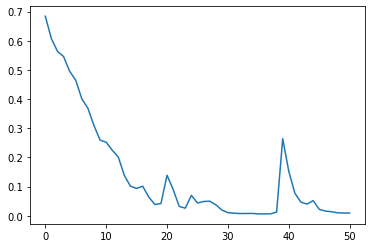

Epoch 1/100
22/22 - 6s - loss: 0.6696 - accuracy: 0.6100 - auc_28: 0.6518 - precision_28: 0.6027 - recall_28: 0.5508 - f1_score: 0.6487 - val_loss: 0.6862 - val_accuracy: 0.5600 - val_auc_28: 0.6930 - val_precision_28: 0.9000 - val_recall_28: 0.2195 - val_f1_score: 0.7069 - 6s/epoch - 265ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6135 - accuracy: 0.6780 - auc_28: 0.7272 - precision_28: 0.6731 - recall_28: 0.6400 - f1_score: 0.6487 - val_loss: 0.7570 - val_accuracy: 0.4533 - val_auc_28: 0.5943 - val_precision_28: 0.0000e+00 - val_recall_28: 0.0000e+00 - val_f1_score: 0.7069 - 1s/epoch - 56ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5948 - accuracy: 0.6928 - auc_28: 0.7459 - precision_28: 0.7010 - recall_28: 0.6277 - f1_score: 0.6487 - val_loss: 0.7519 - val_accuracy: 0.5333 - val_auc_28: 0.6575 - val_precision_28: 0.5417 - val_recall_28: 0.9512 - val_f1_score: 0.7069 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5518 - accuracy: 0.7326 - auc_28: 0.7928 - precision_28: 0.7250 - reca

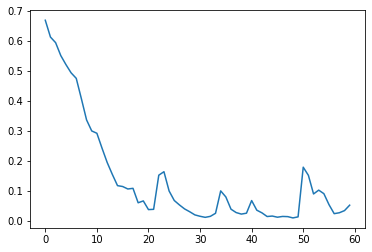

Epoch 1/100
22/22 - 5s - loss: 0.6905 - accuracy: 0.5820 - auc_29: 0.6121 - precision_29: 0.5760 - recall_29: 0.5881 - f1_score: 0.6621 - val_loss: 0.6774 - val_accuracy: 0.5867 - val_auc_29: 0.6287 - val_precision_29: 0.0000e+00 - val_recall_29: 0.0000e+00 - val_f1_score: 0.5849 - 5s/epoch - 246ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6257 - accuracy: 0.6455 - auc_29: 0.7118 - precision_29: 0.6621 - recall_29: 0.5791 - f1_score: 0.6621 - val_loss: 0.7962 - val_accuracy: 0.4133 - val_auc_29: 0.3908 - val_precision_29: 0.4133 - val_recall_29: 1.0000 - val_f1_score: 0.5849 - 1s/epoch - 56ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5859 - accuracy: 0.6839 - auc_29: 0.7570 - precision_29: 0.6817 - recall_29: 0.6776 - f1_score: 0.6621 - val_loss: 0.7624 - val_accuracy: 0.5200 - val_auc_29: 0.5414 - val_precision_29: 0.4444 - val_recall_29: 0.6452 - val_f1_score: 0.5849 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5501 - accuracy: 0.7253 - auc_29: 0.7927 - precision_29: 0.7264 - reca

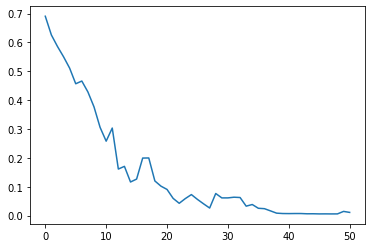

In [20]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_face_model = CNNLSTM(n_features, None, n_length, n_outputs)
    history = cnnlstm_binary_face_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        cnnlstm_binary_face_model.save(model_path / 'face_binary_cnnlstm.h5')

#### Training performance

In [21]:
face_cnnlstm_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
face_cnnlstm_train_results

{'Accuracy': 0.9896583020687103,
 'ROC/AUC': 0.9980927348136902,
 'Precision': 0.9873314619064331,
 'Recall': 0.9915160715579987,
 'F1-score': 0.6547199666500092}

#### Validation performance

In [22]:
face_cnnlstm_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
face_cnnlstm_val_results

{'Accuracy': 0.6488596439361572,
 'ROC/AUC': 0.7135061979293823,
 'Precision': 0.6395294308662415,
 'Recall': 0.664121127128601,
 'F1-score': 0.6530827581882477}

#### Predictions and performance on test set

In [23]:
cnnlstm_binary_face_model = load_model(model_path / 'face_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_face_model.predict(X_test)
_, acc, auc, precision, recall, f1 = cnnlstm_binary_face_model.evaluate(X_test, y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 1s 14ms/step - loss: 0.7824 - accuracy: 0.6791 - auc_25: 0.6454 - precision_25: 0.9240 - recall_25: 0.6840 - f1_score: 0.9259
Accuracy: 67.91% 
ROC/AUC: 0.65 
Precision: 0.92 
Recall: 0.68 
F1 score: 0.93


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

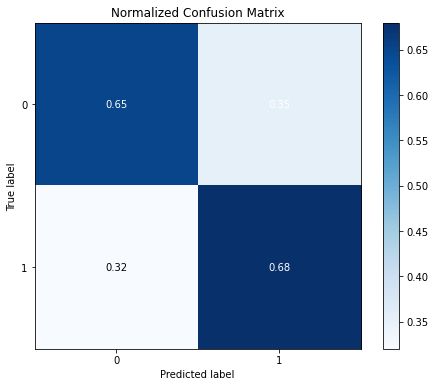

In [24]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

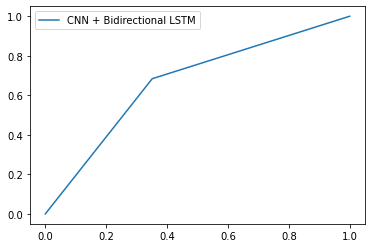

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='CNN + Bidirectional LSTM')
plt.legend()
plt.show()

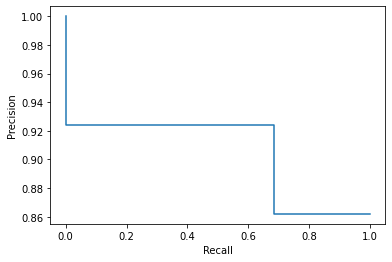

In [26]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### 2.2 RCNN

Epoch 1/100
22/22 - 2s - loss: 0.9086 - accuracy: 0.4926 - auc_30: 0.4857 - precision_30: 0.4643 - recall_30: 0.3600 - f1_score: 0.6494 - val_loss: 0.6845 - val_accuracy: 0.5526 - val_auc_30: 0.5376 - val_precision_30: 0.5467 - val_recall_30: 1.0000 - val_f1_score: 0.7009 - 2s/epoch - 107ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7435 - accuracy: 0.5030 - auc_30: 0.5334 - precision_30: 0.4853 - recall_30: 0.5569 - f1_score: 0.6494 - val_loss: 0.6977 - val_accuracy: 0.4605 - val_auc_30: 0.5143 - val_precision_30: 0.0000e+00 - val_recall_30: 0.0000e+00 - val_f1_score: 0.7009 - 461ms/epoch - 21ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7037 - accuracy: 0.5370 - auc_30: 0.5382 - precision_30: 0.5353 - recall_30: 0.2800 - f1_score: 0.6494 - val_loss: 0.6875 - val_accuracy: 0.5526 - val_auc_30: 0.5143 - val_precision_30: 0.5467 - val_recall_30: 1.0000 - val_f1_score: 0.7009 - 437ms/epoch - 20ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7091 - accuracy: 0.5355 - auc_30: 0.5507 - precision_30: 0.5216 

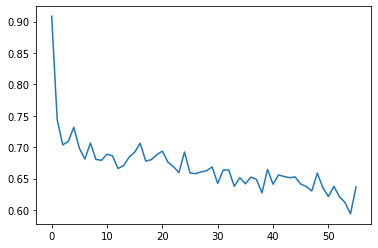

Epoch 1/100
22/22 - 2s - loss: 0.8128 - accuracy: 0.5237 - auc_31: 0.5355 - precision_31: 0.5017 - recall_31: 0.4675 - f1_score: 0.6466 - val_loss: 2.0485 - val_accuracy: 0.4342 - val_auc_31: 0.4401 - val_precision_31: 0.5000 - val_recall_31: 0.0233 - val_f1_score: 0.7009 - 2s/epoch - 106ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7290 - accuracy: 0.5148 - auc_31: 0.5391 - precision_31: 0.4909 - recall_31: 0.4180 - f1_score: 0.6466 - val_loss: 1.3235 - val_accuracy: 0.4342 - val_auc_31: 0.4401 - val_precision_31: 0.5000 - val_recall_31: 0.0233 - val_f1_score: 0.7227 - 459ms/epoch - 21ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7026 - accuracy: 0.5710 - auc_31: 0.5865 - precision_31: 0.5613 - recall_31: 0.4675 - f1_score: 0.6466 - val_loss: 0.9443 - val_accuracy: 0.4868 - val_auc_31: 0.5310 - val_precision_31: 0.8333 - val_recall_31: 0.1163 - val_f1_score: 0.7227 - 453ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7009 - accuracy: 0.5784 - auc_31: 0.5841 - precision_31: 0.5621 - recall

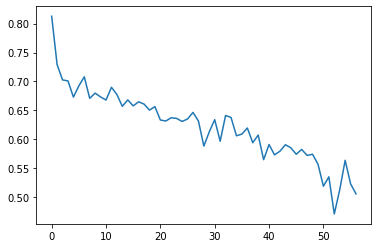

Epoch 1/100
22/22 - 2s - loss: 0.8630 - accuracy: 0.5244 - auc_32: 0.5186 - precision_32: 0.5136 - recall_32: 0.5693 - f1_score: 0.6581 - val_loss: 0.7753 - val_accuracy: 0.4400 - val_auc_32: 0.4853 - val_precision_32: 0.4459 - val_recall_32: 0.9706 - val_f1_score: 0.6239 - 2s/epoch - 109ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7306 - accuracy: 0.5199 - auc_32: 0.5651 - precision_32: 0.5071 - recall_32: 0.7500 - f1_score: 0.6581 - val_loss: 0.6795 - val_accuracy: 0.5600 - val_auc_32: 0.5029 - val_precision_32: 1.0000 - val_recall_32: 0.0294 - val_f1_score: 0.6239 - 461ms/epoch - 21ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7062 - accuracy: 0.5111 - auc_32: 0.5497 - precision_32: 0.5018 - recall_32: 0.4187 - f1_score: 0.6581 - val_loss: 0.7091 - val_accuracy: 0.4400 - val_auc_32: 0.4853 - val_precision_32: 0.4459 - val_recall_32: 0.9706 - val_f1_score: 0.6239 - 446ms/epoch - 20ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6930 - accuracy: 0.5258 - auc_32: 0.5548 - precision_32: 0.5346 - recall

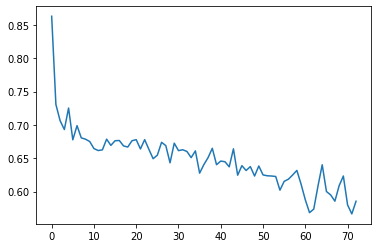

Epoch 1/100
22/22 - 2s - loss: 0.8691 - accuracy: 0.4904 - auc_33: 0.5140 - precision_33: 0.4794 - recall_33: 0.6037 - f1_score: 0.6527 - val_loss: 0.7098 - val_accuracy: 0.5067 - val_auc_33: 0.5000 - val_precision_33: 1.0000 - val_recall_33: 0.0263 - val_f1_score: 0.6726 - 2s/epoch - 106ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7578 - accuracy: 0.5022 - auc_33: 0.5300 - precision_33: 0.4852 - recall_33: 0.4512 - f1_score: 0.6527 - val_loss: 0.6759 - val_accuracy: 0.5600 - val_auc_33: 0.5263 - val_precision_33: 0.7778 - val_recall_33: 0.1842 - val_f1_score: 0.6726 - 496ms/epoch - 23ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7026 - accuracy: 0.5288 - auc_33: 0.5703 - precision_33: 0.5280 - recall_33: 0.2591 - f1_score: 0.6527 - val_loss: 0.6781 - val_accuracy: 0.5200 - val_auc_33: 0.5263 - val_precision_33: 1.0000 - val_recall_33: 0.0526 - val_f1_score: 0.6726 - 491ms/epoch - 22ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6926 - accuracy: 0.5687 - auc_33: 0.5902 - precision_33: 0.5672 - recall

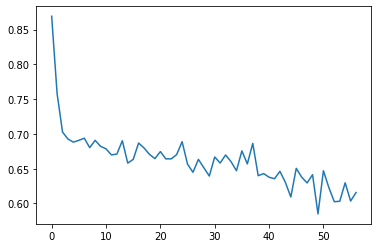

Epoch 1/100
22/22 - 2s - loss: 0.7907 - accuracy: 0.5170 - auc_34: 0.5292 - precision_34: 0.5119 - recall_34: 0.4521 - f1_score: 0.6607 - val_loss: 1.0324 - val_accuracy: 0.4267 - val_auc_34: 0.5247 - val_precision_34: 0.4267 - val_recall_34: 1.0000 - val_f1_score: 0.5981 - 2s/epoch - 109ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7005 - accuracy: 0.5465 - auc_34: 0.5861 - precision_34: 0.5283 - recall_34: 0.7545 - f1_score: 0.6607 - val_loss: 1.0091 - val_accuracy: 0.4267 - val_auc_34: 0.4767 - val_precision_34: 0.4267 - val_recall_34: 1.0000 - val_f1_score: 0.5981 - 493ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7028 - accuracy: 0.5583 - auc_34: 0.5974 - precision_34: 0.5414 - recall_34: 0.6856 - f1_score: 0.6607 - val_loss: 1.2562 - val_accuracy: 0.4400 - val_auc_34: 0.5000 - val_precision_34: 0.4324 - val_recall_34: 1.0000 - val_f1_score: 0.5981 - 467ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7337 - accuracy: 0.5332 - auc_34: 0.5628 - precision_34: 0.5304 - recall

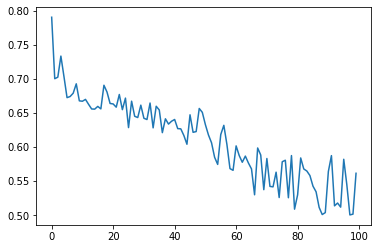

Epoch 1/100
22/22 - 3s - loss: 0.9160 - accuracy: 0.5022 - auc_35: 0.5155 - precision_35: 0.4912 - recall_35: 0.6778 - f1_score: 0.6541 - val_loss: 0.6964 - val_accuracy: 0.4667 - val_auc_35: 0.4730 - val_precision_35: 0.4795 - val_recall_35: 0.9459 - val_f1_score: 0.6607 - 3s/epoch - 119ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7319 - accuracy: 0.5037 - auc_35: 0.5222 - precision_35: 0.4904 - recall_35: 0.5441 - f1_score: 0.6541 - val_loss: 0.7804 - val_accuracy: 0.5067 - val_auc_35: 0.4730 - val_precision_35: 0.0000e+00 - val_recall_35: 0.0000e+00 - val_f1_score: 0.6607 - 445ms/epoch - 20ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6874 - accuracy: 0.5702 - auc_35: 0.5865 - precision_35: 0.5417 - recall_35: 0.7508 - f1_score: 0.6541 - val_loss: 0.8939 - val_accuracy: 0.5067 - val_auc_35: 0.4730 - val_precision_35: 0.0000e+00 - val_recall_35: 0.0000e+00 - val_f1_score: 0.6607 - 469ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7639 - accuracy: 0.5052 - auc_35: 0.5022 - precision_35:

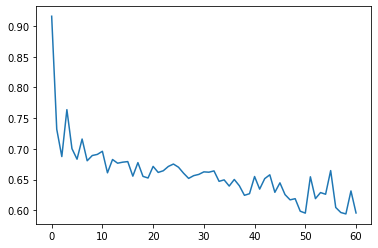

Epoch 1/100
22/22 - 2s - loss: 0.7727 - accuracy: 0.5598 - auc_36: 0.5679 - precision_36: 0.5603 - recall_36: 0.4759 - f1_score: 0.6581 - val_loss: 0.6853 - val_accuracy: 0.5467 - val_auc_36: 0.4835 - val_precision_36: 0.0000e+00 - val_recall_36: 0.0000e+00 - val_f1_score: 0.6239 - 2s/epoch - 106ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7544 - accuracy: 0.5288 - auc_36: 0.5612 - precision_36: 0.5154 - recall_36: 0.6536 - f1_score: 0.6581 - val_loss: 0.6747 - val_accuracy: 0.4667 - val_auc_36: 0.5409 - val_precision_36: 0.4595 - val_recall_36: 1.0000 - val_f1_score: 0.6239 - 463ms/epoch - 21ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7087 - accuracy: 0.5790 - auc_36: 0.5964 - precision_36: 0.6009 - recall_36: 0.4217 - f1_score: 0.6581 - val_loss: 0.6821 - val_accuracy: 0.4667 - val_auc_36: 0.5409 - val_precision_36: 0.4595 - val_recall_36: 1.0000 - val_f1_score: 0.6239 - 451ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7153 - accuracy: 0.5273 - auc_36: 0.5675 - precision_36: 0.5195 

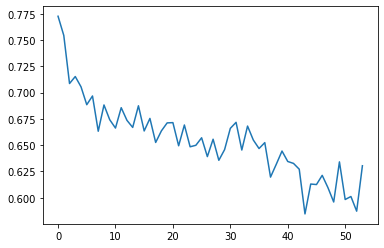

Epoch 1/100
22/22 - 2s - loss: 0.8968 - accuracy: 0.5185 - auc_37: 0.5295 - precision_37: 0.5080 - recall_37: 0.4804 - f1_score: 0.6567 - val_loss: 1.0408 - val_accuracy: 0.5200 - val_auc_37: 0.4875 - val_precision_37: 0.0000e+00 - val_recall_37: 0.0000e+00 - val_f1_score: 0.6364 - 2s/epoch - 111ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7379 - accuracy: 0.5244 - auc_37: 0.5382 - precision_37: 0.5096 - recall_37: 0.7221 - f1_score: 0.6567 - val_loss: 0.9203 - val_accuracy: 0.5200 - val_auc_37: 0.4875 - val_precision_37: 0.0000e+00 - val_recall_37: 0.0000e+00 - val_f1_score: 0.6364 - 483ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7098 - accuracy: 0.5436 - auc_37: 0.5545 - precision_37: 0.5519 - recall_37: 0.3535 - f1_score: 0.6567 - val_loss: 0.8045 - val_accuracy: 0.5200 - val_auc_37: 0.4875 - val_precision_37: 0.0000e+00 - val_recall_37: 0.0000e+00 - val_f1_score: 0.6364 - 493ms/epoch - 22ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7257 - accuracy: 0.5126 - auc_37: 0.5432 - preci

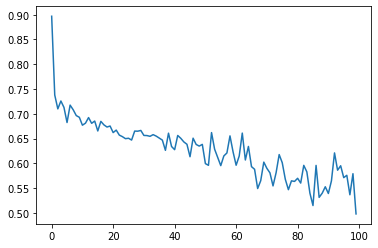

Epoch 1/100
22/22 - 3s - loss: 0.8159 - accuracy: 0.5111 - auc_38: 0.5238 - precision_38: 0.4918 - recall_38: 0.5538 - f1_score: 0.6487 - val_loss: 0.9452 - val_accuracy: 0.4533 - val_auc_38: 0.4512 - val_precision_38: 0.5000 - val_recall_38: 0.0488 - val_f1_score: 0.7069 - 3s/epoch - 121ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7096 - accuracy: 0.5288 - auc_38: 0.5427 - precision_38: 0.5149 - recall_38: 0.3200 - f1_score: 0.6487 - val_loss: 1.0714 - val_accuracy: 0.4800 - val_auc_38: 0.5265 - val_precision_38: 1.0000 - val_recall_38: 0.0488 - val_f1_score: 0.7069 - 479ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7113 - accuracy: 0.5155 - auc_38: 0.5407 - precision_38: 0.4934 - recall_38: 0.3446 - f1_score: 0.6487 - val_loss: 0.8001 - val_accuracy: 0.5467 - val_auc_38: 0.5265 - val_precision_38: 0.5493 - val_recall_38: 0.9512 - val_f1_score: 0.7069 - 485ms/epoch - 22ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7131 - accuracy: 0.5702 - auc_38: 0.5926 - precision_38: 0.5531 - recall

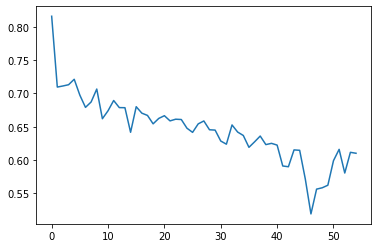

Epoch 1/100
22/22 - 2s - loss: 0.8192 - accuracy: 0.5096 - auc_39: 0.5297 - precision_39: 0.5033 - recall_39: 0.6746 - f1_score: 0.6621 - val_loss: 0.6920 - val_accuracy: 0.5867 - val_auc_39: 0.5000 - val_precision_39: 0.0000e+00 - val_recall_39: 0.0000e+00 - val_f1_score: 0.5849 - 2s/epoch - 109ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7693 - accuracy: 0.5037 - auc_39: 0.5108 - precision_39: 0.4986 - recall_39: 0.5254 - f1_score: 0.6621 - val_loss: 0.6891 - val_accuracy: 0.5867 - val_auc_39: 0.5975 - val_precision_39: 0.0000e+00 - val_recall_39: 0.0000e+00 - val_f1_score: 0.5849 - 493ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6827 - accuracy: 0.5716 - auc_39: 0.6143 - precision_39: 0.5603 - recall_39: 0.6239 - f1_score: 0.6621 - val_loss: 0.6786 - val_accuracy: 0.5867 - val_auc_39: 0.5000 - val_precision_39: 0.0000e+00 - val_recall_39: 0.0000e+00 - val_f1_score: 0.5849 - 483ms/epoch - 22ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7193 - accuracy: 0.5303 - auc_39: 0.5413 - preci

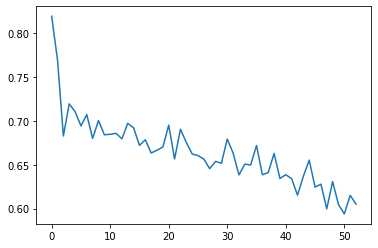

In [27]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rcnn_binary_face_model = RCNN(n_features, None, n_length, n_outputs)
    history = rcnn_binary_face_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        rcnn_binary_face_model.save(model_path / 'face_binary_rcnn.h5')

#### Training performance

In [28]:
face_rcnn_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
face_rcnn_train_results

{'Accuracy': 0.6255949854850769,
 'ROC/AUC': 0.706043142080307,
 'Precision': 0.7118833363056183,
 'Recall': 0.41349937915802004,
 'F1-score': 0.6547853827476502}

#### Validation performance

In [29]:
face_rcnn_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
face_rcnn_val_results

{'Accuracy': 0.5306491166353225,
 'ROC/AUC': 0.5244739353656769,
 'Precision': 0.5220742970705032,
 'Recall': 0.31716651041060684,
 'F1-score': 0.6530827581882477}

#### Predictions and performance on test set

In [30]:
rcnn_binary_face_model = load_model(model_path / 'face_binary_rcnn.h5')
y_pred = rcnn_binary_face_model.predict(X_test)
_, acc, auc, precision, recall, f1 = rcnn_binary_face_model.evaluate(X_test, y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 0s 7ms/step - loss: 0.6812 - accuracy: 0.8619 - auc_38: 0.4944 - precision_38: 0.8647 - recall_38: 0.9957 - f1_score: 0.9259
Accuracy: 86.19% 
ROC/AUC: 0.49 
Precision: 0.86 
Recall: 1.00 
F1 score: 0.93


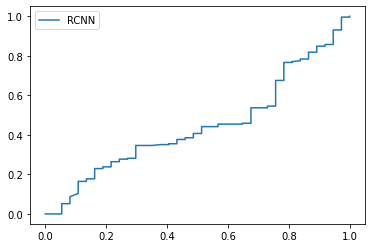

In [31]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='RCNN')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

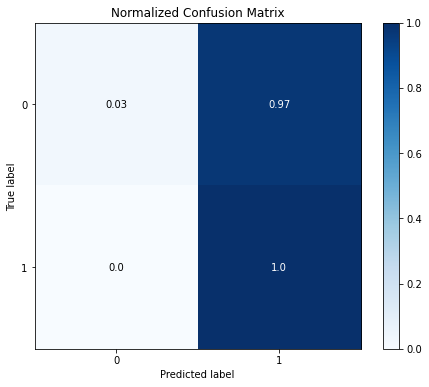

In [32]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

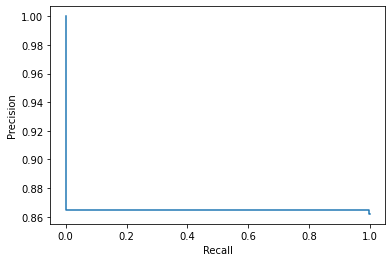

In [33]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

## 3. Multimodal Early Fusion

In [34]:
X_train, X_test, y_train, y_test = load_fusioned_dataset(binary=True)
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[2], X_train.shape[-1], y_train.shape[1]

(752, 1, 350, 60) (752, 1)
(268, 1, 350, 60) (268, 1)


### 3.1 CNN + BiLSTM

Epoch 1/100
22/22 - 6s - loss: 0.7219 - accuracy: 0.6050 - auc_40: 0.6166 - precision_40: 0.5929 - recall_40: 0.5692 - f1_score: 0.6494 - val_loss: 0.6838 - val_accuracy: 0.5921 - val_auc_40: 0.5645 - val_precision_40: 0.7083 - val_recall_40: 0.4146 - val_f1_score: 0.7009 - 6s/epoch - 274ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6225 - accuracy: 0.6553 - auc_40: 0.7122 - precision_40: 0.6608 - recall_40: 0.5815 - f1_score: 0.6494 - val_loss: 0.7116 - val_accuracy: 0.5263 - val_auc_40: 0.5850 - val_precision_40: 0.5333 - val_recall_40: 0.9756 - val_f1_score: 0.7009 - 1s/epoch - 61ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5979 - accuracy: 0.6967 - auc_40: 0.7454 - precision_40: 0.6899 - recall_40: 0.6708 - f1_score: 0.6494 - val_loss: 0.7199 - val_accuracy: 0.5395 - val_auc_40: 0.5502 - val_precision_40: 0.5714 - val_recall_40: 0.5854 - val_f1_score: 0.7009 - 1s/epoch - 61ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5578 - accuracy: 0.7130 - auc_40: 0.7863 - precision_40: 0.7220 - recall_40: 0

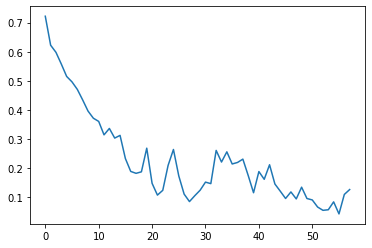

Epoch 1/100
22/22 - 6s - loss: 0.6999 - accuracy: 0.5651 - auc_41: 0.5888 - precision_41: 0.5535 - recall_41: 0.4644 - f1_score: 0.6466 - val_loss: 0.6935 - val_accuracy: 0.4605 - val_auc_41: 0.6579 - val_precision_41: 1.0000 - val_recall_41: 0.0465 - val_f1_score: 0.7227 - 6s/epoch - 258ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6375 - accuracy: 0.6494 - auc_41: 0.6896 - precision_41: 0.6604 - recall_41: 0.5480 - f1_score: 0.6466 - val_loss: 0.7937 - val_accuracy: 0.4342 - val_auc_41: 0.7512 - val_precision_41: 0.0000e+00 - val_recall_41: 0.0000e+00 - val_f1_score: 0.7227 - 1s/epoch - 58ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6146 - accuracy: 0.6642 - auc_41: 0.7218 - precision_41: 0.7034 - recall_41: 0.5139 - f1_score: 0.6466 - val_loss: 0.7413 - val_accuracy: 0.5658 - val_auc_41: 0.7005 - val_precision_41: 0.5658 - val_recall_41: 1.0000 - val_f1_score: 0.7227 - 1s/epoch - 58ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5646 - accuracy: 0.7012 - auc_41: 0.7777 - precision_41: 0.6921 - reca

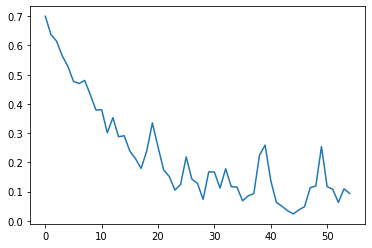

Epoch 1/100
22/22 - 6s - loss: 0.7363 - accuracy: 0.6012 - auc_42: 0.6164 - precision_42: 0.5963 - recall_42: 0.5783 - f1_score: 0.6581 - val_loss: 0.6667 - val_accuracy: 0.6267 - val_auc_42: 0.6374 - val_precision_42: 0.6154 - val_recall_42: 0.4706 - val_f1_score: 0.6239 - 6s/epoch - 261ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6073 - accuracy: 0.6677 - auc_42: 0.7303 - precision_42: 0.6743 - recall_42: 0.6235 - f1_score: 0.6581 - val_loss: 0.6731 - val_accuracy: 0.6533 - val_auc_42: 0.6539 - val_precision_42: 0.5833 - val_recall_42: 0.8235 - val_f1_score: 0.6239 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5649 - accuracy: 0.6913 - auc_42: 0.7750 - precision_42: 0.7016 - recall_42: 0.6446 - f1_score: 0.6581 - val_loss: 0.7761 - val_accuracy: 0.5867 - val_auc_42: 0.6029 - val_precision_42: 0.5385 - val_recall_42: 0.6176 - val_f1_score: 0.6239 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5515 - accuracy: 0.7238 - auc_42: 0.7909 - precision_42: 0.7316 - recall_42: 0

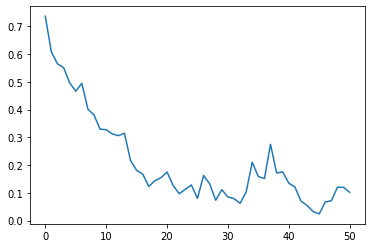

Epoch 1/100
22/22 - 6s - loss: 0.7094 - accuracy: 0.5968 - auc_43: 0.6123 - precision_43: 0.5965 - recall_43: 0.5183 - f1_score: 0.6527 - val_loss: 0.6789 - val_accuracy: 0.5333 - val_auc_43: 0.6348 - val_precision_43: 0.5224 - val_recall_43: 0.9211 - val_f1_score: 0.6726 - 6s/epoch - 251ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6104 - accuracy: 0.6750 - auc_43: 0.7256 - precision_43: 0.6812 - recall_43: 0.6189 - f1_score: 0.6527 - val_loss: 0.7510 - val_accuracy: 0.4800 - val_auc_43: 0.6568 - val_precision_43: 0.3333 - val_recall_43: 0.0263 - val_f1_score: 0.6726 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5736 - accuracy: 0.7164 - auc_43: 0.7747 - precision_43: 0.7267 - recall_43: 0.6646 - f1_score: 0.6527 - val_loss: 0.8719 - val_accuracy: 0.5067 - val_auc_43: 0.6835 - val_precision_43: 1.0000 - val_recall_43: 0.0263 - val_f1_score: 0.6726 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5635 - accuracy: 0.7105 - auc_43: 0.7802 - precision_43: 0.7157 - recall_43: 0

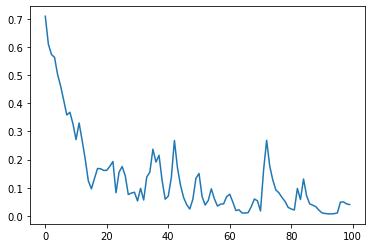

Epoch 1/100
22/22 - 5s - loss: 0.6885 - accuracy: 0.6056 - auc_44: 0.6421 - precision_44: 0.6031 - recall_44: 0.5868 - f1_score: 0.6607 - val_loss: 0.6785 - val_accuracy: 0.5733 - val_auc_44: 0.6243 - val_precision_44: 0.0000e+00 - val_recall_44: 0.0000e+00 - val_f1_score: 0.5981 - 5s/epoch - 250ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6031 - accuracy: 0.6647 - auc_44: 0.7337 - precision_44: 0.6814 - recall_44: 0.6018 - f1_score: 0.6607 - val_loss: 0.7407 - val_accuracy: 0.5600 - val_auc_44: 0.5956 - val_precision_44: 0.0000e+00 - val_recall_44: 0.0000e+00 - val_f1_score: 0.5981 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5726 - accuracy: 0.7208 - auc_44: 0.7700 - precision_44: 0.7526 - recall_44: 0.6467 - f1_score: 0.6607 - val_loss: 0.7603 - val_accuracy: 0.4267 - val_auc_44: 0.5538 - val_precision_44: 0.4225 - val_recall_44: 0.9375 - val_f1_score: 0.5981 - 1s/epoch - 58ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5440 - accuracy: 0.7312 - auc_44: 0.7969 - precision_44: 0.731

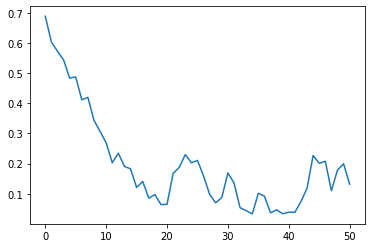

Epoch 1/100
22/22 - 6s - loss: 0.6894 - accuracy: 0.6071 - auc_45: 0.6295 - precision_45: 0.6198 - recall_45: 0.4954 - f1_score: 0.6541 - val_loss: 0.6773 - val_accuracy: 0.5200 - val_auc_45: 0.6760 - val_precision_45: 0.5068 - val_recall_45: 1.0000 - val_f1_score: 0.6607 - 6s/epoch - 260ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6018 - accuracy: 0.6736 - auc_45: 0.7365 - precision_45: 0.6837 - recall_45: 0.6109 - f1_score: 0.6541 - val_loss: 0.7783 - val_accuracy: 0.5333 - val_auc_45: 0.6298 - val_precision_45: 1.0000 - val_recall_45: 0.0541 - val_f1_score: 0.6607 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5969 - accuracy: 0.6809 - auc_45: 0.7370 - precision_45: 0.7425 - recall_45: 0.5258 - f1_score: 0.6541 - val_loss: 0.8260 - val_accuracy: 0.5067 - val_auc_45: 0.6807 - val_precision_45: 0.5000 - val_recall_45: 1.0000 - val_f1_score: 0.6607 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5428 - accuracy: 0.7061 - auc_45: 0.7936 - precision_45: 0.7211 - recall_45: 0

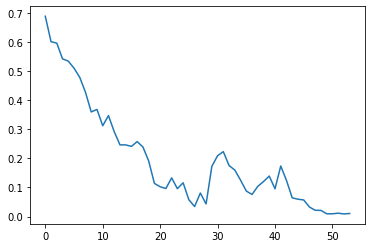

Epoch 1/100
22/22 - 5s - loss: 0.7354 - accuracy: 0.5731 - auc_46: 0.5960 - precision_46: 0.5724 - recall_46: 0.5120 - f1_score: 0.6581 - val_loss: 0.6804 - val_accuracy: 0.4400 - val_auc_46: 0.7113 - val_precision_46: 0.4459 - val_recall_46: 0.9706 - val_f1_score: 0.6239 - 5s/epoch - 248ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6169 - accuracy: 0.6617 - auc_46: 0.7253 - precision_46: 0.6547 - recall_46: 0.6566 - f1_score: 0.6581 - val_loss: 0.6476 - val_accuracy: 0.6800 - val_auc_46: 0.6686 - val_precision_46: 0.6471 - val_recall_46: 0.6471 - val_f1_score: 0.6239 - 1s/epoch - 67ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5956 - accuracy: 0.6869 - auc_46: 0.7429 - precision_46: 0.7027 - recall_46: 0.6265 - f1_score: 0.6581 - val_loss: 0.7757 - val_accuracy: 0.4533 - val_auc_46: 0.6700 - val_precision_46: 0.4533 - val_recall_46: 1.0000 - val_f1_score: 0.6239 - 1s/epoch - 58ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5592 - accuracy: 0.7341 - auc_46: 0.7859 - precision_46: 0.7184 - recall_46: 0

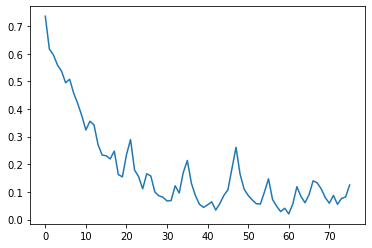

Epoch 1/100
22/22 - 6s - loss: 0.7125 - accuracy: 0.6130 - auc_47: 0.6270 - precision_47: 0.6102 - recall_47: 0.5770 - f1_score: 0.6567 - val_loss: 0.6857 - val_accuracy: 0.5467 - val_auc_47: 0.6564 - val_precision_47: 0.5079 - val_recall_47: 0.9143 - val_f1_score: 0.6364 - 6s/epoch - 264ms/step
Epoch 2/100
22/22 - 1s - loss: 0.5989 - accuracy: 0.6972 - auc_47: 0.7356 - precision_47: 0.7100 - recall_47: 0.6435 - f1_score: 0.6567 - val_loss: 0.7961 - val_accuracy: 0.5200 - val_auc_47: 0.5300 - val_precision_47: 0.0000e+00 - val_recall_47: 0.0000e+00 - val_f1_score: 0.6364 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5511 - accuracy: 0.7253 - auc_47: 0.7921 - precision_47: 0.7736 - recall_47: 0.6193 - f1_score: 0.6567 - val_loss: 0.7304 - val_accuracy: 0.6267 - val_auc_47: 0.6639 - val_precision_47: 0.5897 - val_recall_47: 0.6571 - val_f1_score: 0.6364 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5220 - accuracy: 0.7474 - auc_47: 0.8110 - precision_47: 0.7667 - reca

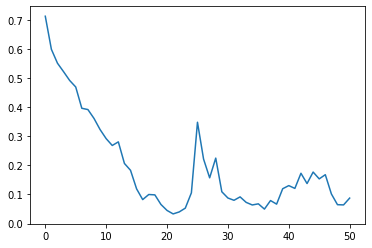

Epoch 1/100
22/22 - 6s - loss: 0.7156 - accuracy: 0.6041 - auc_48: 0.6294 - precision_48: 0.5966 - recall_48: 0.5415 - f1_score: 0.6487 - val_loss: 0.8452 - val_accuracy: 0.4533 - val_auc_48: 0.6643 - val_precision_48: 0.0000e+00 - val_recall_48: 0.0000e+00 - val_f1_score: 0.7069 - 6s/epoch - 262ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6039 - accuracy: 0.6750 - auc_48: 0.7387 - precision_48: 0.6842 - recall_48: 0.6000 - f1_score: 0.6487 - val_loss: 0.7334 - val_accuracy: 0.5867 - val_auc_48: 0.6969 - val_precision_48: 0.5806 - val_recall_48: 0.8780 - val_f1_score: 0.7069 - 1s/epoch - 68ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5779 - accuracy: 0.7016 - auc_48: 0.7645 - precision_48: 0.6892 - recall_48: 0.6892 - f1_score: 0.6487 - val_loss: 0.6523 - val_accuracy: 0.6133 - val_auc_48: 0.6926 - val_precision_48: 0.6111 - val_recall_48: 0.8049 - val_f1_score: 0.7069 - 1s/epoch - 68ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5399 - accuracy: 0.7282 - auc_48: 0.8015 - precision_48: 0.7282 - reca

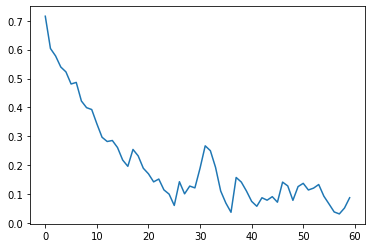

Epoch 1/100
22/22 - 5s - loss: 0.7100 - accuracy: 0.5997 - auc_49: 0.6150 - precision_49: 0.5964 - recall_49: 0.5910 - f1_score: 0.6621 - val_loss: 0.6600 - val_accuracy: 0.5867 - val_auc_49: 0.6774 - val_precision_49: 0.0000e+00 - val_recall_49: 0.0000e+00 - val_f1_score: 0.5849 - 5s/epoch - 250ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6100 - accuracy: 0.6588 - auc_49: 0.7288 - precision_49: 0.6857 - recall_49: 0.5731 - f1_score: 0.6621 - val_loss: 0.7664 - val_accuracy: 0.4933 - val_auc_49: 0.6180 - val_precision_49: 0.4478 - val_recall_49: 0.9677 - val_f1_score: 0.5849 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5685 - accuracy: 0.6972 - auc_49: 0.7733 - precision_49: 0.6958 - recall_49: 0.6896 - f1_score: 0.6621 - val_loss: 0.7767 - val_accuracy: 0.5333 - val_auc_49: 0.6397 - val_precision_49: 0.4655 - val_recall_49: 0.8710 - val_f1_score: 0.5849 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5206 - accuracy: 0.7445 - auc_49: 0.8169 - precision_49: 0.7580 - reca

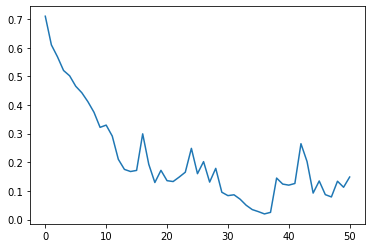

In [35]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_earlyfusion_model = CNNLSTM(n_features, None, n_length, n_outputs)
    history = cnnlstm_binary_earlyfusion_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        cnnlstm_binary_earlyfusion_model.save(model_path / 'early_binary_cnnlstm.h5')

#### Training performance

In [36]:
early_cnnlstm_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
early_cnnlstm_train_results

{'Accuracy': 0.9666056394577026,
 'ROC/AUC': 0.992790025472641,
 'Precision': 0.963034325838089,
 'Recall': 0.9687928915023803,
 'F1-score': 0.6547199666500092}

#### Validation performance

In [37]:
early_cnnlstm_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
early_cnnlstm_val_results

{'Accuracy': 0.6594210505485535,
 'ROC/AUC': 0.7298977553844452,
 'Precision': 0.6535007774829864,
 'Recall': 0.6849057912826538,
 'F1-score': 0.6530827581882477}

#### Predictions and performance on test set

In [38]:
cnnlstm_binary_earlyfusion_model = load_model(model_path / 'early_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_earlyfusion_model.predict(X_test)
_, acc, auc, precision, recall, f1 = cnnlstm_binary_earlyfusion_model.evaluate(X_test, y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 1s 14ms/step - loss: 2.3189 - accuracy: 0.5299 - auc_43: 0.5937 - precision_43: 0.9070 - recall_43: 0.5065 - f1_score: 0.9259
Accuracy: 52.99% 
ROC/AUC: 0.59 
Precision: 0.91 
Recall: 0.51 
F1 score: 0.93


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

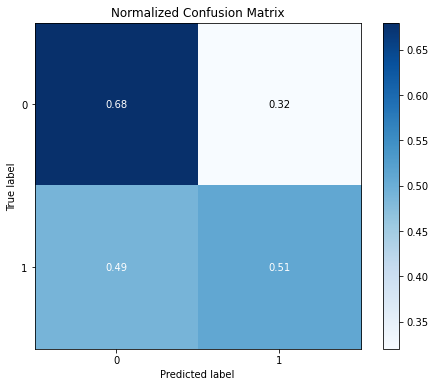

In [39]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

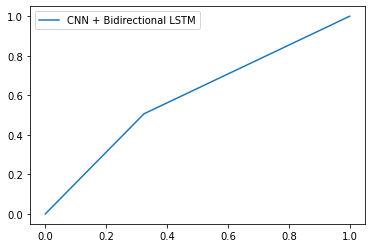

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='CNN + Bidirectional LSTM')
plt.legend()
plt.show()

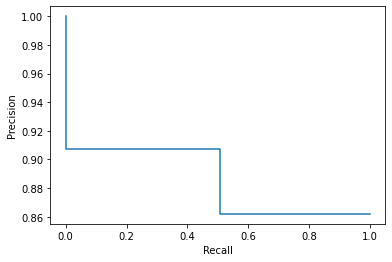

In [41]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### 3.2 RCNN

Epoch 1/100
22/22 - 2s - loss: 0.8882 - accuracy: 0.5118 - auc_50: 0.5266 - precision_50: 0.4928 - recall_50: 0.5292 - f1_score: 0.6494 - val_loss: 0.7006 - val_accuracy: 0.4605 - val_auc_50: 0.5143 - val_precision_50: 0.0000e+00 - val_recall_50: 0.0000e+00 - val_f1_score: 0.7009 - 2s/epoch - 107ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7014 - accuracy: 0.5695 - auc_50: 0.5781 - precision_50: 0.6809 - recall_50: 0.1969 - f1_score: 0.6494 - val_loss: 0.7185 - val_accuracy: 0.4474 - val_auc_50: 0.4857 - val_precision_50: 0.0000e+00 - val_recall_50: 0.0000e+00 - val_f1_score: 0.7009 - 452ms/epoch - 21ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7180 - accuracy: 0.5725 - auc_50: 0.5870 - precision_50: 0.6023 - recall_50: 0.3262 - f1_score: 0.6494 - val_loss: 0.7240 - val_accuracy: 0.4474 - val_auc_50: 0.4857 - val_precision_50: 0.0000e+00 - val_recall_50: 0.0000e+00 - val_f1_score: 0.7009 - 469ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6843 - accuracy: 0.6050 - auc_50: 0.6438 - preci

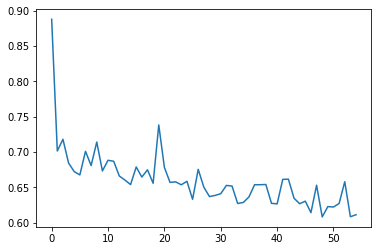

Epoch 1/100
22/22 - 2s - loss: 0.9046 - accuracy: 0.5118 - auc_51: 0.5312 - precision_51: 0.4839 - recall_51: 0.3251 - f1_score: 0.6466 - val_loss: 1.7876 - val_accuracy: 0.4342 - val_auc_51: 0.4288 - val_precision_51: 0.5000 - val_recall_51: 0.0233 - val_f1_score: 0.7227 - 2s/epoch - 107ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7020 - accuracy: 0.5814 - auc_51: 0.6157 - precision_51: 0.5820 - recall_51: 0.4396 - f1_score: 0.6466 - val_loss: 1.2242 - val_accuracy: 0.4342 - val_auc_51: 0.4401 - val_precision_51: 0.5000 - val_recall_51: 0.0233 - val_f1_score: 0.7227 - 477ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6976 - accuracy: 0.5473 - auc_51: 0.5800 - precision_51: 0.5392 - recall_51: 0.3622 - f1_score: 0.6466 - val_loss: 1.1688 - val_accuracy: 0.5000 - val_auc_51: 0.4401 - val_precision_51: 0.5352 - val_recall_51: 0.8837 - val_f1_score: 0.7227 - 473ms/epoch - 22ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7100 - accuracy: 0.5607 - auc_51: 0.6078 - precision_51: 0.5602 - recall

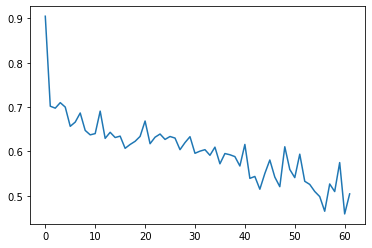

Epoch 1/100
22/22 - 2s - loss: 0.8923 - accuracy: 0.4948 - auc_52: 0.4896 - precision_52: 0.4848 - recall_52: 0.4789 - f1_score: 0.6581 - val_loss: 0.6942 - val_accuracy: 0.4533 - val_auc_52: 0.5147 - val_precision_52: 0.4533 - val_recall_52: 1.0000 - val_f1_score: 0.6239 - 2s/epoch - 107ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7278 - accuracy: 0.5170 - auc_52: 0.5588 - precision_52: 0.5053 - recall_52: 0.7199 - f1_score: 0.6581 - val_loss: 0.6826 - val_accuracy: 0.5600 - val_auc_52: 0.5147 - val_precision_52: 1.0000 - val_recall_52: 0.0294 - val_f1_score: 0.6239 - 482ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7021 - accuracy: 0.5539 - auc_52: 0.6007 - precision_52: 0.5568 - recall_52: 0.4428 - f1_score: 0.6581 - val_loss: 0.6814 - val_accuracy: 0.5600 - val_auc_52: 0.5147 - val_precision_52: 1.0000 - val_recall_52: 0.0294 - val_f1_score: 0.6239 - 473ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7066 - accuracy: 0.5347 - auc_52: 0.5719 - precision_52: 0.5356 - recall

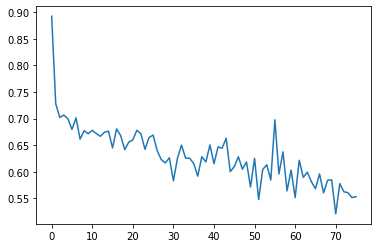

Epoch 1/100
22/22 - 3s - loss: 0.8139 - accuracy: 0.5539 - auc_53: 0.5358 - precision_53: 0.5663 - recall_53: 0.3384 - f1_score: 0.6527 - val_loss: 1.0335 - val_accuracy: 0.4933 - val_auc_53: 0.4456 - val_precision_53: 0.0000e+00 - val_recall_53: 0.0000e+00 - val_f1_score: 0.6726 - 3s/epoch - 119ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7248 - accuracy: 0.5273 - auc_53: 0.5700 - precision_53: 0.5235 - recall_53: 0.2713 - f1_score: 0.6527 - val_loss: 0.6763 - val_accuracy: 0.5067 - val_auc_53: 0.5128 - val_precision_53: 0.5067 - val_recall_53: 1.0000 - val_f1_score: 0.6726 - 476ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6916 - accuracy: 0.5524 - auc_53: 0.5789 - precision_53: 0.5514 - recall_53: 0.4085 - f1_score: 0.6527 - val_loss: 0.6747 - val_accuracy: 0.5200 - val_auc_53: 0.5263 - val_precision_53: 1.0000 - val_recall_53: 0.0526 - val_f1_score: 0.6726 - 479ms/epoch - 22ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6776 - accuracy: 0.5746 - auc_53: 0.6196 - precision_53: 0.5840 

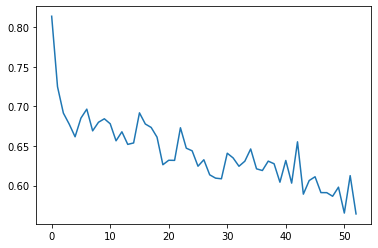

Epoch 1/100
22/22 - 2s - loss: 0.8632 - accuracy: 0.5037 - auc_54: 0.5005 - precision_54: 0.4976 - recall_54: 0.6138 - f1_score: 0.6607 - val_loss: 1.1889 - val_accuracy: 0.4267 - val_auc_54: 0.4651 - val_precision_54: 0.4267 - val_recall_54: 1.0000 - val_f1_score: 0.5981 - 2s/epoch - 107ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6903 - accuracy: 0.5126 - auc_54: 0.5535 - precision_54: 0.5066 - recall_54: 0.4581 - f1_score: 0.6607 - val_loss: 0.6789 - val_accuracy: 0.4533 - val_auc_54: 0.5233 - val_precision_54: 0.4384 - val_recall_54: 1.0000 - val_f1_score: 0.5981 - 476ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7130 - accuracy: 0.5702 - auc_54: 0.5918 - precision_54: 0.5811 - recall_54: 0.4611 - f1_score: 0.6607 - val_loss: 0.6708 - val_accuracy: 0.5733 - val_auc_54: 0.5233 - val_precision_54: 0.0000e+00 - val_recall_54: 0.0000e+00 - val_f1_score: 0.5981 - 470ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7184 - accuracy: 0.5746 - auc_54: 0.5928 - precision_54: 0.6533 

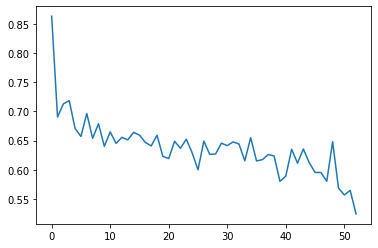

Epoch 1/100
22/22 - 2s - loss: 0.8676 - accuracy: 0.5140 - auc_55: 0.5290 - precision_55: 0.5000 - recall_55: 0.5106 - f1_score: 0.6541 - val_loss: 0.6740 - val_accuracy: 0.5333 - val_auc_55: 0.5395 - val_precision_55: 1.0000 - val_recall_55: 0.0541 - val_f1_score: 0.6607 - 2s/epoch - 107ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7480 - accuracy: 0.5377 - auc_55: 0.5714 - precision_55: 0.5211 - recall_55: 0.6018 - f1_score: 0.6541 - val_loss: 0.6781 - val_accuracy: 0.4933 - val_auc_55: 0.6515 - val_precision_55: 0.4933 - val_recall_55: 1.0000 - val_f1_score: 0.6607 - 455ms/epoch - 21ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7022 - accuracy: 0.5258 - auc_55: 0.5593 - precision_55: 0.5100 - recall_55: 0.6231 - f1_score: 0.6541 - val_loss: 1.0560 - val_accuracy: 0.5067 - val_auc_55: 0.5092 - val_precision_55: 0.0000e+00 - val_recall_55: 0.0000e+00 - val_f1_score: 0.6607 - 465ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7489 - accuracy: 0.5391 - auc_55: 0.5597 - precision_55: 0.5279 

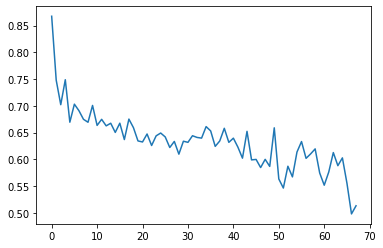

Epoch 1/100
22/22 - 2s - loss: 0.8518 - accuracy: 0.5229 - auc_56: 0.5368 - precision_56: 0.5125 - recall_56: 0.5572 - f1_score: 0.6581 - val_loss: 1.4844 - val_accuracy: 0.5467 - val_auc_56: 0.4821 - val_precision_56: 0.0000e+00 - val_recall_56: 0.0000e+00 - val_f1_score: 0.5981 - 2s/epoch - 106ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7363 - accuracy: 0.5554 - auc_56: 0.5571 - precision_56: 0.5576 - recall_56: 0.4518 - f1_score: 0.6581 - val_loss: 0.6617 - val_accuracy: 0.5733 - val_auc_56: 0.5409 - val_precision_56: 1.0000 - val_recall_56: 0.0588 - val_f1_score: 0.6239 - 470ms/epoch - 21ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7041 - accuracy: 0.5465 - auc_56: 0.5588 - precision_56: 0.6582 - recall_56: 0.1566 - f1_score: 0.6581 - val_loss: 0.6938 - val_accuracy: 0.4533 - val_auc_56: 0.5179 - val_precision_56: 0.4533 - val_recall_56: 1.0000 - val_f1_score: 0.6239 - 442ms/epoch - 20ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7112 - accuracy: 0.5583 - auc_56: 0.5756 - precision_56: 0.5511 

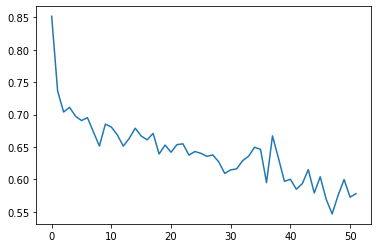

Epoch 1/100
22/22 - 3s - loss: 0.8529 - accuracy: 0.5377 - auc_57: 0.5496 - precision_57: 0.5256 - recall_57: 0.5589 - f1_score: 0.6554 - val_loss: 0.7643 - val_accuracy: 0.4667 - val_auc_57: 0.4971 - val_precision_57: 0.4667 - val_recall_57: 1.0000 - val_f1_score: 0.6364 - 3s/epoch - 121ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7530 - accuracy: 0.5362 - auc_57: 0.5462 - precision_57: 0.5374 - recall_57: 0.3686 - f1_score: 0.6567 - val_loss: 0.9751 - val_accuracy: 0.5200 - val_auc_57: 0.4875 - val_precision_57: 0.0000e+00 - val_recall_57: 0.0000e+00 - val_f1_score: 0.6364 - 453ms/epoch - 21ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6806 - accuracy: 0.5495 - auc_57: 0.6095 - precision_57: 0.5328 - recall_57: 0.6375 - f1_score: 0.6567 - val_loss: 0.8489 - val_accuracy: 0.4667 - val_auc_57: 0.4875 - val_precision_57: 0.4667 - val_recall_57: 1.0000 - val_f1_score: 0.6364 - 454ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7059 - accuracy: 0.5391 - auc_57: 0.5800 - precision_57: 0.5385 

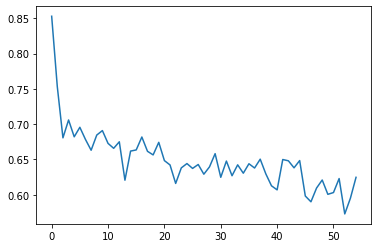

Epoch 1/100
22/22 - 2s - loss: 0.7613 - accuracy: 0.5716 - auc_58: 0.5936 - precision_58: 0.5610 - recall_58: 0.4954 - f1_score: 0.6487 - val_loss: 0.6609 - val_accuracy: 0.4800 - val_auc_58: 0.5222 - val_precision_58: 0.6667 - val_recall_58: 0.0976 - val_f1_score: 0.7069 - 2s/epoch - 107ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7327 - accuracy: 0.5613 - auc_58: 0.5933 - precision_58: 0.5614 - recall_58: 0.3938 - f1_score: 0.6487 - val_loss: 0.6476 - val_accuracy: 0.5467 - val_auc_58: 0.5753 - val_precision_58: 1.0000 - val_recall_58: 0.1707 - val_f1_score: 0.7069 - 479ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6659 - accuracy: 0.6130 - auc_58: 0.6688 - precision_58: 0.6113 - recall_58: 0.5323 - f1_score: 0.6487 - val_loss: 0.6869 - val_accuracy: 0.5467 - val_auc_58: 0.5742 - val_precision_58: 0.5467 - val_recall_58: 1.0000 - val_f1_score: 0.7069 - 452ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6954 - accuracy: 0.5495 - auc_58: 0.5958 - precision_58: 0.5549 - recall

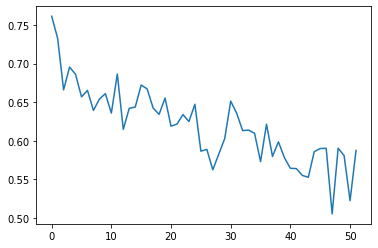

Epoch 1/100
22/22 - 2s - loss: 0.8663 - accuracy: 0.5022 - auc_59: 0.5247 - precision_59: 0.4973 - recall_59: 0.5463 - f1_score: 0.6621 - val_loss: 0.7124 - val_accuracy: 0.4133 - val_auc_59: 0.5000 - val_precision_59: 0.4133 - val_recall_59: 1.0000 - val_f1_score: 0.5849 - 2s/epoch - 107ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7362 - accuracy: 0.5554 - auc_59: 0.5761 - precision_59: 0.5438 - recall_59: 0.6299 - f1_score: 0.6621 - val_loss: 0.6858 - val_accuracy: 0.5867 - val_auc_59: 0.5000 - val_precision_59: 0.0000e+00 - val_recall_59: 0.0000e+00 - val_f1_score: 0.5849 - 483ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6949 - accuracy: 0.5569 - auc_59: 0.5786 - precision_59: 0.5676 - recall_59: 0.4388 - f1_score: 0.6621 - val_loss: 0.7137 - val_accuracy: 0.4133 - val_auc_59: 0.5000 - val_precision_59: 0.4133 - val_recall_59: 1.0000 - val_f1_score: 0.5849 - 485ms/epoch - 22ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7028 - accuracy: 0.5583 - auc_59: 0.5942 - precision_59: 0.5657 

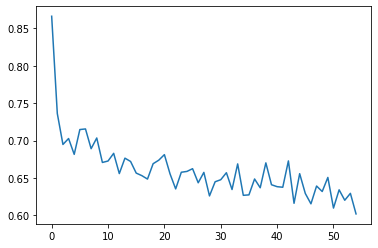

In [42]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rcnn_binary_earlyfusion_model = RCNN(n_features, None, n_length, n_outputs)
    history = rcnn_binary_earlyfusion_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        rcnn_binary_earlyfusion_model.save(model_path / 'early_binary_rcnn.h5')

#### Training performance

In [43]:
early_rcnn_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
early_rcnn_train_results

{'Accuracy': 0.644800853729248,
 'ROC/AUC': 0.7190497279167175,
 'Precision': 0.7775914788246154,
 'Recall': 0.3934986382722855,
 'F1-score': 0.6547199666500092}

#### Validation performance

In [44]:
early_rcnn_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
early_rcnn_val_results

{'Accuracy': 0.5066315799951553,
 'ROC/AUC': 0.5170414268970489,
 'Precision': 0.6879473716020584,
 'Recall': 0.3408760974183679,
 'F1-score': 0.6530827581882477}

#### Predictions and performance on test set

In [45]:
rcnn_binary_earlyfusion_model = load_model(model_path / 'early_binary_rcnn.h5')
y_pred = rcnn_binary_earlyfusion_model.predict(X_test)
_, acc, auc, precision, recall, f1 = rcnn_binary_earlyfusion_model.evaluate(X_test, y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 0s 8ms/step - loss: 0.7644 - accuracy: 0.2276 - auc_58: 0.4729 - precision_58: 0.9000 - recall_58: 0.1169 - f1_score: 0.9259
Accuracy: 22.76% 
ROC/AUC: 0.47 
Precision: 0.90 
Recall: 0.12 
F1 score: 0.93


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

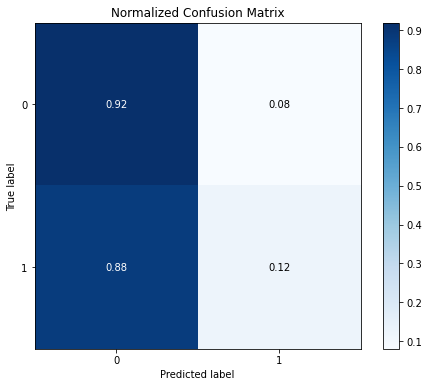

In [46]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

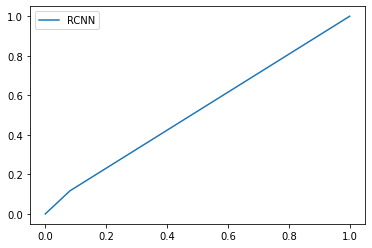

In [47]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='RCNN')
plt.legend()
plt.show()

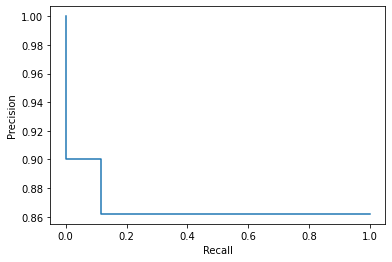

In [48]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

## 4. Multimodal Late Fusion

In [49]:
body_X_train, body_X_test, body_y_train, body_y_test = load_dataset('skeleton', binary=True, fusion=True)
body_X = body_X_train.copy()
body_y = body_y_train.copy()

print(body_X_train.shape, body_y_train.shape)
print(body_X_test.shape, body_y_test.shape)

(752, 1, 350, 35) (752, 1)
(268, 1, 350, 35) (268, 1)


In [50]:
face_X_train, face_X_test, face_y_train, face_y_test = load_dataset('AUs', binary=True)
face_X = face_X_train.copy()
face_y = face_y_train.copy()

print(face_X_train.shape, face_y_train.shape)
print(face_X_test.shape, face_y_test.shape)

(752, 1, 350, 25) (752, 1)
(268, 1, 350, 25) (268, 1)


In [51]:
n_length, body_features, face_features, n_outputs = face_X_train.shape[2], body_X_train.shape[-1], face_X_train.shape[-1], body_y_train.shape[1]

### 4.1 CNN + BiLSTM (Concatenation)

Epoch 1/100
22/22 - 7s - loss: 0.6816 - accuracy: 0.5991 - auc_60: 0.6231 - precision_60: 0.5882 - recall_60: 0.5538 - f1_score: 0.6494 - val_loss: 0.7697 - val_accuracy: 0.4605 - val_auc_60: 0.7094 - val_precision_60: 0.0000e+00 - val_recall_60: 0.0000e+00 - val_f1_score: 0.7009 - 7s/epoch - 299ms/step
Epoch 2/100
22/22 - 1s - loss: 0.5986 - accuracy: 0.6716 - auc_60: 0.7401 - precision_60: 0.6886 - recall_60: 0.5785 - f1_score: 0.6494 - val_loss: 0.7122 - val_accuracy: 0.5395 - val_auc_60: 0.7735 - val_precision_60: 0.5395 - val_recall_60: 1.0000 - val_f1_score: 0.7009 - 1s/epoch - 53ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5791 - accuracy: 0.6953 - auc_60: 0.7610 - precision_60: 0.6842 - recall_60: 0.6800 - f1_score: 0.6494 - val_loss: 0.7178 - val_accuracy: 0.5395 - val_auc_60: 0.7418 - val_precision_60: 0.5395 - val_recall_60: 1.0000 - val_f1_score: 0.7009 - 1s/epoch - 47ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5171 - accuracy: 0.7470 - auc_60: 0.8206 - precision_60: 0.7533 - reca

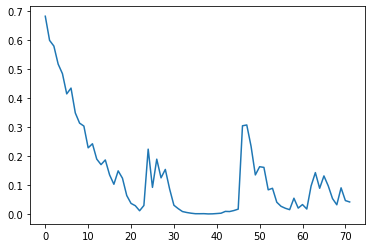

Epoch 1/100
22/22 - 6s - loss: 0.6836 - accuracy: 0.5725 - auc_61: 0.6091 - precision_61: 0.5574 - recall_61: 0.5108 - f1_score: 0.6466 - val_loss: 0.6660 - val_accuracy: 0.5658 - val_auc_61: 0.6762 - val_precision_61: 0.5676 - val_recall_61: 0.9767 - val_f1_score: 0.7227 - 6s/epoch - 287ms/step
Epoch 2/100
22/22 - 1s - loss: 0.5936 - accuracy: 0.6731 - auc_61: 0.7466 - precision_61: 0.6574 - recall_61: 0.6594 - f1_score: 0.6466 - val_loss: 0.8112 - val_accuracy: 0.4474 - val_auc_61: 0.7410 - val_precision_61: 1.0000 - val_recall_61: 0.0233 - val_f1_score: 0.7227 - 1s/epoch - 47ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5551 - accuracy: 0.7204 - auc_61: 0.7875 - precision_61: 0.7030 - recall_61: 0.7183 - f1_score: 0.6466 - val_loss: 1.3592 - val_accuracy: 0.4342 - val_auc_61: 0.6180 - val_precision_61: 0.0000e+00 - val_recall_61: 0.0000e+00 - val_f1_score: 0.7227 - 1s/epoch - 47ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5165 - accuracy: 0.7426 - auc_61: 0.8228 - precision_61: 0.7443 - reca

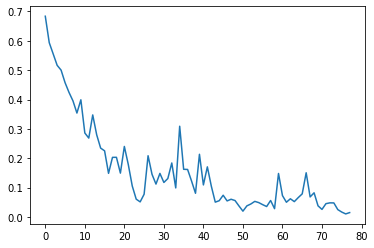

Epoch 1/100
22/22 - 7s - loss: 0.6976 - accuracy: 0.5849 - auc_62: 0.6154 - precision_62: 0.5853 - recall_62: 0.5271 - f1_score: 0.6581 - val_loss: 0.7058 - val_accuracy: 0.5467 - val_auc_62: 0.6879 - val_precision_62: 0.0000e+00 - val_recall_62: 0.0000e+00 - val_f1_score: 0.6239 - 7s/epoch - 315ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6238 - accuracy: 0.6425 - auc_62: 0.7036 - precision_62: 0.6541 - recall_62: 0.5753 - f1_score: 0.6581 - val_loss: 0.6939 - val_accuracy: 0.5067 - val_auc_62: 0.5778 - val_precision_62: 0.4746 - val_recall_62: 0.8235 - val_f1_score: 0.6239 - 1s/epoch - 53ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5789 - accuracy: 0.6957 - auc_62: 0.7710 - precision_62: 0.6969 - recall_62: 0.6717 - f1_score: 0.6581 - val_loss: 0.6555 - val_accuracy: 0.6000 - val_auc_62: 0.6905 - val_precision_62: 0.7000 - val_recall_62: 0.2059 - val_f1_score: 0.6239 - 1s/epoch - 53ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5426 - accuracy: 0.7238 - auc_62: 0.7990 - precision_62: 0.7259 - reca

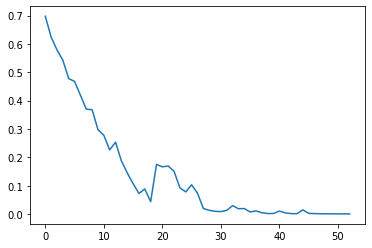

Epoch 1/100
22/22 - 6s - loss: 0.6685 - accuracy: 0.6292 - auc_63: 0.6515 - precision_63: 0.6288 - recall_63: 0.5732 - f1_score: 0.6527 - val_loss: 0.7651 - val_accuracy: 0.5067 - val_auc_63: 0.6540 - val_precision_63: 0.5067 - val_recall_63: 1.0000 - val_f1_score: 0.6726 - 6s/epoch - 280ms/step
Epoch 2/100
22/22 - 1s - loss: 0.5995 - accuracy: 0.6750 - auc_63: 0.7384 - precision_63: 0.6731 - recall_63: 0.6402 - f1_score: 0.6527 - val_loss: 0.7581 - val_accuracy: 0.5200 - val_auc_63: 0.6686 - val_precision_63: 0.5135 - val_recall_63: 1.0000 - val_f1_score: 0.6726 - 1s/epoch - 53ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5454 - accuracy: 0.7341 - auc_63: 0.7999 - precision_63: 0.7284 - recall_63: 0.7195 - f1_score: 0.6527 - val_loss: 0.6900 - val_accuracy: 0.6133 - val_auc_63: 0.6177 - val_precision_63: 0.6098 - val_recall_63: 0.6579 - val_f1_score: 0.6726 - 1s/epoch - 53ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5301 - accuracy: 0.7326 - auc_63: 0.8116 - precision_63: 0.7262 - recall_63: 0

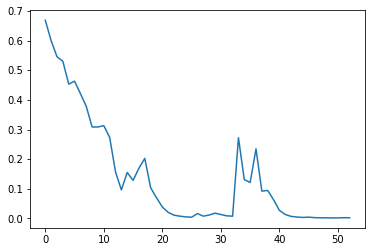

Epoch 1/100
22/22 - 7s - loss: 0.6835 - accuracy: 0.6086 - auc_64: 0.6326 - precision_64: 0.6042 - recall_64: 0.5988 - f1_score: 0.6607 - val_loss: 0.8364 - val_accuracy: 0.5733 - val_auc_64: 0.5345 - val_precision_64: 0.0000e+00 - val_recall_64: 0.0000e+00 - val_f1_score: 0.5981 - 7s/epoch - 308ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6033 - accuracy: 0.6824 - auc_64: 0.7372 - precision_64: 0.7059 - recall_64: 0.6108 - f1_score: 0.6607 - val_loss: 0.7761 - val_accuracy: 0.5200 - val_auc_64: 0.5265 - val_precision_64: 0.4412 - val_recall_64: 0.4688 - val_f1_score: 0.5981 - 1s/epoch - 53ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5245 - accuracy: 0.7400 - auc_64: 0.8172 - precision_64: 0.7337 - recall_64: 0.7425 - f1_score: 0.6607 - val_loss: 0.6677 - val_accuracy: 0.6400 - val_auc_64: 0.6751 - val_precision_64: 0.5510 - val_recall_64: 0.8438 - val_f1_score: 0.5981 - 1s/epoch - 53ms/step
Epoch 4/100
22/22 - 1s - loss: 0.4658 - accuracy: 0.7740 - auc_64: 0.8601 - precision_64: 0.7751 - reca

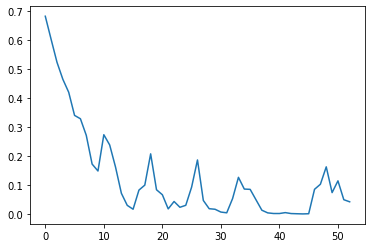

Epoch 1/100
22/22 - 6s - loss: 0.6863 - accuracy: 0.5908 - auc_65: 0.6237 - precision_65: 0.5802 - recall_65: 0.5714 - f1_score: 0.6541 - val_loss: 0.7008 - val_accuracy: 0.5067 - val_auc_65: 0.7084 - val_precision_65: 0.5000 - val_recall_65: 1.0000 - val_f1_score: 0.6607 - 6s/epoch - 282ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6127 - accuracy: 0.6706 - auc_65: 0.7274 - precision_65: 0.6559 - recall_65: 0.6778 - f1_score: 0.6541 - val_loss: 0.6044 - val_accuracy: 0.7200 - val_auc_65: 0.7994 - val_precision_65: 0.7857 - val_recall_65: 0.5946 - val_f1_score: 0.6607 - 1s/epoch - 54ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5631 - accuracy: 0.7031 - auc_65: 0.7808 - precision_65: 0.6928 - recall_65: 0.6991 - f1_score: 0.6541 - val_loss: 0.7097 - val_accuracy: 0.5067 - val_auc_65: 0.7877 - val_precision_65: 0.0000e+00 - val_recall_65: 0.0000e+00 - val_f1_score: 0.6607 - 1s/epoch - 48ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5527 - accuracy: 0.7341 - auc_65: 0.7956 - precision_65: 0.7395 - reca

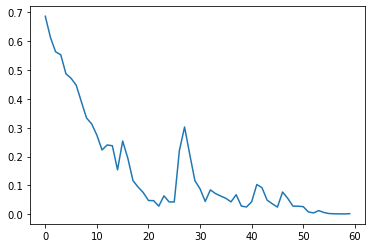

Epoch 1/100
22/22 - 6s - loss: 0.6821 - accuracy: 0.5923 - auc_66: 0.6192 - precision_66: 0.5870 - recall_66: 0.5693 - f1_score: 0.6581 - val_loss: 0.7725 - val_accuracy: 0.5467 - val_auc_66: 0.7138 - val_precision_66: 0.0000e+00 - val_recall_66: 0.0000e+00 - val_f1_score: 0.6239 - 6s/epoch - 280ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6006 - accuracy: 0.6677 - auc_66: 0.7392 - precision_66: 0.6754 - recall_66: 0.6205 - f1_score: 0.6581 - val_loss: 0.9243 - val_accuracy: 0.4533 - val_auc_66: 0.6657 - val_precision_66: 0.4533 - val_recall_66: 1.0000 - val_f1_score: 0.6239 - 1s/epoch - 47ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5630 - accuracy: 0.7297 - auc_66: 0.7860 - precision_66: 0.7185 - recall_66: 0.7380 - f1_score: 0.6581 - val_loss: 0.7609 - val_accuracy: 0.5467 - val_auc_66: 0.6915 - val_precision_66: 0.5000 - val_recall_66: 0.9706 - val_f1_score: 0.6239 - 1s/epoch - 54ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5239 - accuracy: 0.7445 - auc_66: 0.8202 - precision_66: 0.7331 - reca

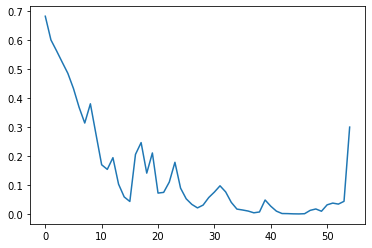

Epoch 1/100
22/22 - 7s - loss: 0.6647 - accuracy: 0.5953 - auc_67: 0.6397 - precision_67: 0.5960 - recall_67: 0.5347 - f1_score: 0.6567 - val_loss: 0.7334 - val_accuracy: 0.6267 - val_auc_67: 0.6218 - val_precision_67: 0.5714 - val_recall_67: 0.8000 - val_f1_score: 0.6364 - 7s/epoch - 297ms/step
Epoch 2/100
22/22 - 1s - loss: 0.5958 - accuracy: 0.6780 - auc_67: 0.7442 - precision_67: 0.6805 - recall_67: 0.6435 - f1_score: 0.6567 - val_loss: 0.7200 - val_accuracy: 0.5333 - val_auc_67: 0.6139 - val_precision_67: 0.5000 - val_recall_67: 0.9143 - val_f1_score: 0.6364 - 1s/epoch - 53ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5316 - accuracy: 0.7164 - auc_67: 0.8079 - precision_67: 0.7179 - recall_67: 0.6918 - f1_score: 0.6567 - val_loss: 0.7572 - val_accuracy: 0.5067 - val_auc_67: 0.6721 - val_precision_67: 0.4861 - val_recall_67: 1.0000 - val_f1_score: 0.6364 - 1s/epoch - 47ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5080 - accuracy: 0.7312 - auc_67: 0.8283 - precision_67: 0.7264 - recall_67: 0

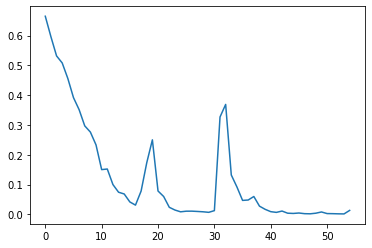

Epoch 1/100
22/22 - 6s - loss: 0.6812 - accuracy: 0.6056 - auc_68: 0.6335 - precision_68: 0.5960 - recall_68: 0.5538 - f1_score: 0.6487 - val_loss: 0.6712 - val_accuracy: 0.6400 - val_auc_68: 0.7195 - val_precision_68: 1.0000 - val_recall_68: 0.3415 - val_f1_score: 0.7069 - 6s/epoch - 294ms/step
Epoch 2/100
22/22 - 1s - loss: 0.5933 - accuracy: 0.6972 - auc_68: 0.7486 - precision_68: 0.6923 - recall_68: 0.6646 - f1_score: 0.6487 - val_loss: 0.8068 - val_accuracy: 0.4533 - val_auc_68: 0.6216 - val_precision_68: 0.0000e+00 - val_recall_68: 0.0000e+00 - val_f1_score: 0.7069 - 1s/epoch - 47ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5668 - accuracy: 0.6972 - auc_68: 0.7761 - precision_68: 0.6923 - recall_68: 0.6646 - f1_score: 0.6487 - val_loss: 0.6625 - val_accuracy: 0.5467 - val_auc_68: 0.6467 - val_precision_68: 0.5614 - val_recall_68: 0.7805 - val_f1_score: 0.7069 - 1s/epoch - 54ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5231 - accuracy: 0.7371 - auc_68: 0.8165 - precision_68: 0.7333 - reca

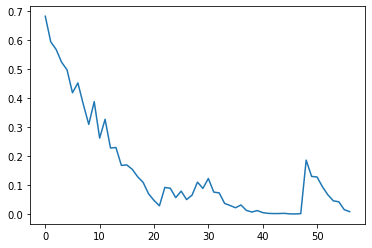

Epoch 1/100
22/22 - 6s - loss: 0.6877 - accuracy: 0.5923 - auc_69: 0.6193 - precision_69: 0.5886 - recall_69: 0.5851 - f1_score: 0.6621 - val_loss: 0.6523 - val_accuracy: 0.5867 - val_auc_69: 0.6804 - val_precision_69: 0.0000e+00 - val_recall_69: 0.0000e+00 - val_f1_score: 0.5849 - 6s/epoch - 281ms/step
Epoch 2/100
22/22 - 1s - loss: 0.5989 - accuracy: 0.6736 - auc_69: 0.7390 - precision_69: 0.6781 - recall_69: 0.6478 - f1_score: 0.6621 - val_loss: 0.6716 - val_accuracy: 0.6000 - val_auc_69: 0.6672 - val_precision_69: 0.5111 - val_recall_69: 0.7419 - val_f1_score: 0.5849 - 1s/epoch - 47ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5746 - accuracy: 0.7223 - auc_69: 0.7711 - precision_69: 0.7168 - recall_69: 0.7254 - f1_score: 0.6621 - val_loss: 0.9530 - val_accuracy: 0.4133 - val_auc_69: 0.6345 - val_precision_69: 0.4133 - val_recall_69: 1.0000 - val_f1_score: 0.5849 - 1s/epoch - 47ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5343 - accuracy: 0.7134 - auc_69: 0.8082 - precision_69: 0.6953 - reca

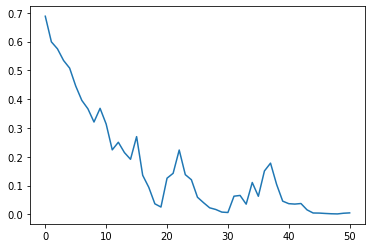

In [52]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(body_X):
    body_X_train, body_X_val = body_X[train_index], body_X[val_index]
    face_X_train, face_X_val = face_X[train_index], face_X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_latefusion_model = CNNLSTM(body_features, face_features, n_length, n_outputs, fusion=True)
    history = cnnlstm_binary_latefusion_model.trainFusioned(body_X_train, face_X_train, y_train, body_X_val, face_X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        cnnlstm_binary_latefusion_model.save(model_path / 'late_binary_cnnlstm.h5')

#### Training performance

In [53]:
late_cnnlstm_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
late_cnnlstm_train_results

{'Accuracy': 0.9858167290687561,
 'ROC/AUC': 0.9956899344921112,
 'Precision': 0.9857773065567017,
 'Recall': 0.9852016568183899,
 'F1-score': 0.6547199666500092}

#### Validation performance

In [54]:
late_cnnlstm_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
late_cnnlstm_val_results

{'Accuracy': 0.6633333384990692,
 'ROC/AUC': 0.7318009972572327,
 'Precision': 0.6389837145805359,
 'Recall': 0.6906024247407914,
 'F1-score': 0.6530827581882477}

#### Performance and predictions on test set

In [55]:
cnnlstm_binary_latefusion_model = load_model(model_path / 'late_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_latefusion_model.predict([body_X_test, face_X_test])
_, acc, auc, precision, recall, f1 = cnnlstm_binary_latefusion_model.evaluate([body_X_test, face_X_test], y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 1s 12ms/step - loss: 1.2952 - accuracy: 0.5821 - auc_61: 0.6477 - precision_61: 0.9103 - recall_61: 0.5714 - f1_score: 0.9259
Accuracy: 58.21% 
ROC/AUC: 0.65 
Precision: 0.91 
Recall: 0.57 
F1 score: 0.93


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

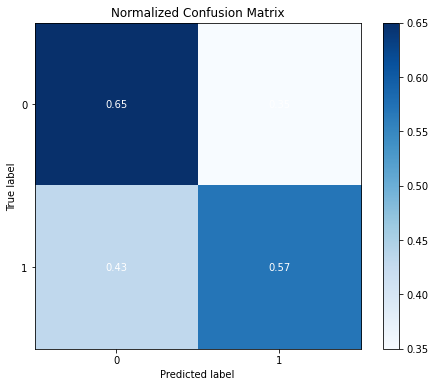

In [56]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

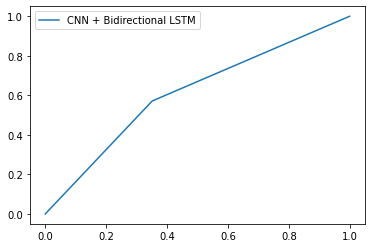

In [57]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='CNN + Bidirectional LSTM')
plt.legend()
plt.show()

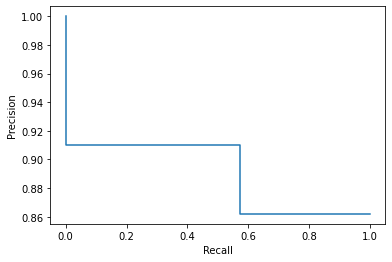

In [58]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### 4.2 RCNN (Concatenation)

Epoch 1/100
22/22 - 3s - loss: 0.7073 - accuracy: 0.5962 - auc_70: 0.6309 - precision_70: 0.5897 - recall_70: 0.5262 - f1_score: 0.6494 - val_loss: 1.4059 - val_accuracy: 0.4474 - val_auc_70: 0.6355 - val_precision_70: 0.0000e+00 - val_recall_70: 0.0000e+00 - val_f1_score: 0.7009 - 3s/epoch - 136ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6366 - accuracy: 0.6494 - auc_70: 0.7021 - precision_70: 0.6560 - recall_70: 0.5692 - f1_score: 0.6494 - val_loss: 5.3026 - val_accuracy: 0.5395 - val_auc_70: 0.5000 - val_precision_70: 0.5395 - val_recall_70: 1.0000 - val_f1_score: 0.7009 - 477ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.5986 - accuracy: 0.6953 - auc_70: 0.7431 - precision_70: 0.7031 - recall_70: 0.6338 - f1_score: 0.6494 - val_loss: 4.3960 - val_accuracy: 0.4605 - val_auc_70: 0.4714 - val_precision_70: 0.0000e+00 - val_recall_70: 0.0000e+00 - val_f1_score: 0.7009 - 477ms/epoch - 22ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6055 - accuracy: 0.7012 - auc_70: 0.7428 - precision_70:

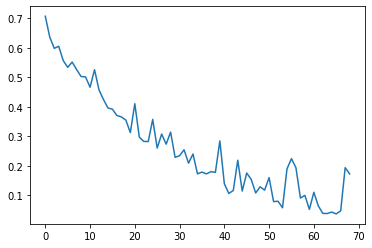

Epoch 1/100
22/22 - 3s - loss: 0.6960 - accuracy: 0.5962 - auc_71: 0.6233 - precision_71: 0.5828 - recall_71: 0.5449 - f1_score: 0.6466 - val_loss: 2.2709 - val_accuracy: 0.4342 - val_auc_71: 0.5895 - val_precision_71: 0.0000e+00 - val_recall_71: 0.0000e+00 - val_f1_score: 0.7227 - 3s/epoch - 116ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6263 - accuracy: 0.6435 - auc_71: 0.7025 - precision_71: 0.6486 - recall_71: 0.5542 - f1_score: 0.6466 - val_loss: 4.3761 - val_accuracy: 0.5658 - val_auc_71: 0.5000 - val_precision_71: 0.5658 - val_recall_71: 1.0000 - val_f1_score: 0.7227 - 478ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6076 - accuracy: 0.6538 - auc_71: 0.7345 - precision_71: 0.6606 - recall_71: 0.5666 - f1_score: 0.6466 - val_loss: 2.4683 - val_accuracy: 0.4342 - val_auc_71: 0.6402 - val_precision_71: 0.0000e+00 - val_recall_71: 0.0000e+00 - val_f1_score: 0.7227 - 473ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6148 - accuracy: 0.6760 - auc_71: 0.7328 - precision_71:

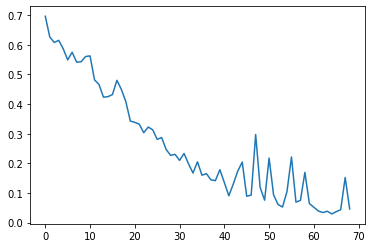

Epoch 1/100
22/22 - 3s - loss: 0.6941 - accuracy: 0.5968 - auc_72: 0.6463 - precision_72: 0.5974 - recall_72: 0.5452 - f1_score: 0.6581 - val_loss: 8.8648 - val_accuracy: 0.4533 - val_auc_72: 0.5000 - val_precision_72: 0.4533 - val_recall_72: 1.0000 - val_f1_score: 0.6239 - 3s/epoch - 117ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6212 - accuracy: 0.6529 - auc_72: 0.7081 - precision_72: 0.6601 - recall_72: 0.6024 - f1_score: 0.6581 - val_loss: 1.4424 - val_accuracy: 0.4533 - val_auc_72: 0.7367 - val_precision_72: 0.4521 - val_recall_72: 0.9706 - val_f1_score: 0.6239 - 488ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.5994 - accuracy: 0.6839 - auc_72: 0.7438 - precision_72: 0.7021 - recall_72: 0.6175 - f1_score: 0.6581 - val_loss: 0.9276 - val_accuracy: 0.5600 - val_auc_72: 0.7245 - val_precision_72: 0.5079 - val_recall_72: 0.9412 - val_f1_score: 0.6239 - 475ms/epoch - 22ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5919 - accuracy: 0.6972 - auc_72: 0.7515 - precision_72: 0.7153 - recall

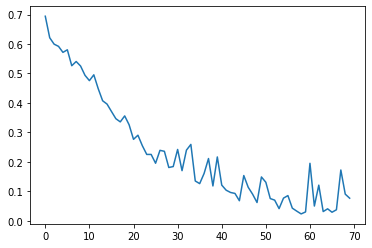

Epoch 1/100
22/22 - 3s - loss: 0.6787 - accuracy: 0.6263 - auc_73: 0.6590 - precision_73: 0.6263 - recall_73: 0.5671 - f1_score: 0.6527 - val_loss: 3.1865 - val_accuracy: 0.5333 - val_auc_73: 0.5420 - val_precision_73: 0.5205 - val_recall_73: 1.0000 - val_f1_score: 0.6726 - 3s/epoch - 127ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6183 - accuracy: 0.6440 - auc_73: 0.7197 - precision_73: 0.6408 - recall_73: 0.6037 - f1_score: 0.6527 - val_loss: 3.7040 - val_accuracy: 0.5067 - val_auc_73: 0.5541 - val_precision_73: 0.5067 - val_recall_73: 1.0000 - val_f1_score: 0.6726 - 481ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.5942 - accuracy: 0.6839 - auc_73: 0.7445 - precision_73: 0.6900 - recall_73: 0.6311 - f1_score: 0.6527 - val_loss: 1.2866 - val_accuracy: 0.5333 - val_auc_73: 0.6767 - val_precision_73: 0.5205 - val_recall_73: 1.0000 - val_f1_score: 0.6726 - 490ms/epoch - 22ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5843 - accuracy: 0.7046 - auc_73: 0.7585 - precision_73: 0.7148 - recall

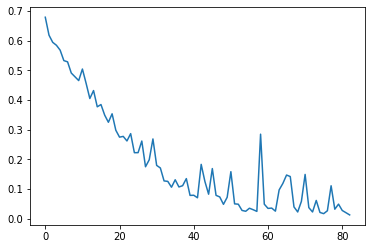

Epoch 1/100
22/22 - 3s - loss: 0.7195 - accuracy: 0.5997 - auc_74: 0.6324 - precision_74: 0.5963 - recall_74: 0.5838 - f1_score: 0.6607 - val_loss: 5.8451 - val_accuracy: 0.5733 - val_auc_74: 0.5000 - val_precision_74: 0.0000e+00 - val_recall_74: 0.0000e+00 - val_f1_score: 0.5981 - 3s/epoch - 116ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6599 - accuracy: 0.6440 - auc_74: 0.6693 - precision_74: 0.6643 - recall_74: 0.5629 - f1_score: 0.6607 - val_loss: 0.8598 - val_accuracy: 0.5067 - val_auc_74: 0.7068 - val_precision_74: 0.4603 - val_recall_74: 0.9062 - val_f1_score: 0.5981 - 502ms/epoch - 23ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6043 - accuracy: 0.6898 - auc_74: 0.7453 - precision_74: 0.7026 - recall_74: 0.6437 - f1_score: 0.6607 - val_loss: 2.3294 - val_accuracy: 0.5733 - val_auc_74: 0.5912 - val_precision_74: 0.0000e+00 - val_recall_74: 0.0000e+00 - val_f1_score: 0.5981 - 467ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6003 - accuracy: 0.6765 - auc_74: 0.7443 - precision_74:

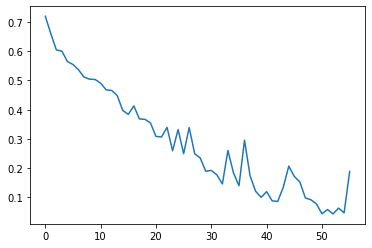

Epoch 1/100
22/22 - 3s - loss: 0.7166 - accuracy: 0.6041 - auc_75: 0.6352 - precision_75: 0.5900 - recall_75: 0.6079 - f1_score: 0.6541 - val_loss: 11.9972 - val_accuracy: 0.4933 - val_auc_75: 0.5000 - val_precision_75: 0.4933 - val_recall_75: 1.0000 - val_f1_score: 0.6607 - 3s/epoch - 115ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6236 - accuracy: 0.6455 - auc_75: 0.7103 - precision_75: 0.6422 - recall_75: 0.6109 - f1_score: 0.6541 - val_loss: 0.9391 - val_accuracy: 0.5867 - val_auc_75: 0.7511 - val_precision_75: 0.5469 - val_recall_75: 0.9459 - val_f1_score: 0.6607 - 504ms/epoch - 23ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6151 - accuracy: 0.6736 - auc_75: 0.7344 - precision_75: 0.6901 - recall_75: 0.5957 - f1_score: 0.6541 - val_loss: 2.0219 - val_accuracy: 0.5067 - val_auc_75: 0.5263 - val_precision_75: 0.0000e+00 - val_recall_75: 0.0000e+00 - val_f1_score: 0.6607 - 464ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5949 - accuracy: 0.6691 - auc_75: 0.7409 - precision_75: 0.6768

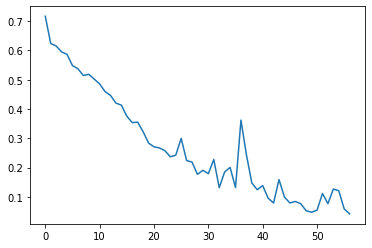

Epoch 1/100
22/22 - 2s - loss: 0.6982 - accuracy: 0.6027 - auc_76: 0.6279 - precision_76: 0.5952 - recall_76: 0.5934 - f1_score: 0.6581 - val_loss: 2.5627 - val_accuracy: 0.4533 - val_auc_76: 0.6815 - val_precision_76: 0.4533 - val_recall_76: 1.0000 - val_f1_score: 0.6239 - 2s/epoch - 113ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6145 - accuracy: 0.6544 - auc_76: 0.7218 - precision_76: 0.6612 - recall_76: 0.6054 - f1_score: 0.6581 - val_loss: 0.8784 - val_accuracy: 0.6533 - val_auc_76: 0.7012 - val_precision_76: 0.7500 - val_recall_76: 0.3529 - val_f1_score: 0.6239 - 499ms/epoch - 23ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6209 - accuracy: 0.6736 - auc_76: 0.7219 - precision_76: 0.6869 - recall_76: 0.6145 - f1_score: 0.6581 - val_loss: 4.7426 - val_accuracy: 0.4533 - val_auc_76: 0.5054 - val_precision_76: 0.4533 - val_recall_76: 1.0000 - val_f1_score: 0.6239 - 461ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5864 - accuracy: 0.6824 - auc_76: 0.7549 - precision_76: 0.6736 - recall

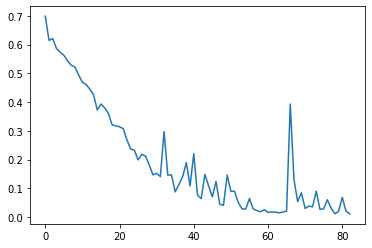

Epoch 1/100
22/22 - 3s - loss: 0.7033 - accuracy: 0.5982 - auc_77: 0.6413 - precision_77: 0.5897 - recall_77: 0.5861 - f1_score: 0.6567 - val_loss: 1.1403 - val_accuracy: 0.4933 - val_auc_77: 0.5707 - val_precision_77: 0.4727 - val_recall_77: 0.7429 - val_f1_score: 0.6364 - 3s/epoch - 131ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6364 - accuracy: 0.6603 - auc_77: 0.7054 - precision_77: 0.6656 - recall_77: 0.6133 - f1_score: 0.6567 - val_loss: 4.4968 - val_accuracy: 0.4667 - val_auc_77: 0.4971 - val_precision_77: 0.4667 - val_recall_77: 1.0000 - val_f1_score: 0.6364 - 462ms/epoch - 21ms/step
Epoch 3/100
22/22 - 0s - loss: 0.5972 - accuracy: 0.6883 - auc_77: 0.7450 - precision_77: 0.6863 - recall_77: 0.6677 - f1_score: 0.6567 - val_loss: 2.5634 - val_accuracy: 0.5333 - val_auc_77: 0.5386 - val_precision_77: 0.0000e+00 - val_recall_77: 0.0000e+00 - val_f1_score: 0.6364 - 458ms/epoch - 21ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5804 - accuracy: 0.6972 - auc_77: 0.7678 - precision_77: 0.7143 

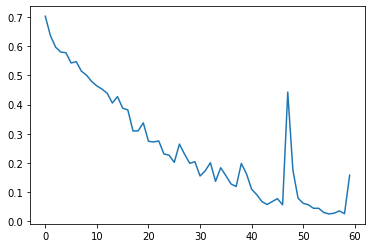

Epoch 1/100
22/22 - 3s - loss: 0.7007 - accuracy: 0.6130 - auc_78: 0.6454 - precision_78: 0.5963 - recall_78: 0.6000 - f1_score: 0.6487 - val_loss: 12.8920 - val_accuracy: 0.5467 - val_auc_78: 0.5000 - val_precision_78: 0.5467 - val_recall_78: 1.0000 - val_f1_score: 0.7069 - 3s/epoch - 116ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6333 - accuracy: 0.6573 - auc_78: 0.7228 - precision_78: 0.6449 - recall_78: 0.6369 - f1_score: 0.6487 - val_loss: 5.0892 - val_accuracy: 0.5467 - val_auc_78: 0.5000 - val_precision_78: 0.5467 - val_recall_78: 1.0000 - val_f1_score: 0.7069 - 489ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.5978 - accuracy: 0.6898 - auc_78: 0.7483 - precision_78: 0.6923 - recall_78: 0.6369 - f1_score: 0.6487 - val_loss: 7.0465 - val_accuracy: 0.5467 - val_auc_78: 0.5000 - val_precision_78: 0.5467 - val_recall_78: 1.0000 - val_f1_score: 0.7069 - 488ms/epoch - 22ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5979 - accuracy: 0.6809 - auc_78: 0.7446 - precision_78: 0.6687 - recal

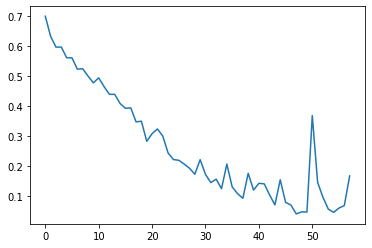

Epoch 1/100
22/22 - 3s - loss: 0.7200 - accuracy: 0.6115 - auc_79: 0.6309 - precision_79: 0.6098 - recall_79: 0.5970 - f1_score: 0.6621 - val_loss: 8.4876 - val_accuracy: 0.4133 - val_auc_79: 0.5000 - val_precision_79: 0.4133 - val_recall_79: 1.0000 - val_f1_score: 0.5849 - 3s/epoch - 116ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6232 - accuracy: 0.6632 - auc_79: 0.7207 - precision_79: 0.6626 - recall_79: 0.6507 - f1_score: 0.6621 - val_loss: 1.7716 - val_accuracy: 0.5867 - val_auc_79: 0.4212 - val_precision_79: 0.0000e+00 - val_recall_79: 0.0000e+00 - val_f1_score: 0.5849 - 488ms/epoch - 22ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6310 - accuracy: 0.6484 - auc_79: 0.6993 - precision_79: 0.6601 - recall_79: 0.5970 - f1_score: 0.6621 - val_loss: 6.1785 - val_accuracy: 0.4133 - val_auc_79: 0.5000 - val_precision_79: 0.4133 - val_recall_79: 1.0000 - val_f1_score: 0.5849 - 487ms/epoch - 22ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5971 - accuracy: 0.6795 - auc_79: 0.7452 - precision_79: 0.6799 

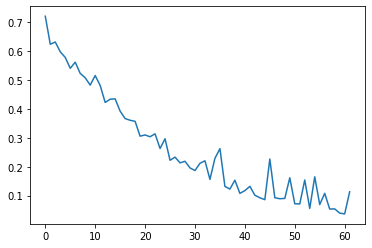

In [59]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(body_X):
    body_X_train, body_X_val = body_X[train_index], body_X[val_index]
    face_X_train, face_X_val = face_X[train_index], face_X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rcnn_binary_latefusion_model = RCNN(body_features, face_features, n_length, n_outputs, fusion=True)
    history = rcnn_binary_latefusion_model.trainFusioned(body_X_train, face_X_train, y_train, body_X_val, face_X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        rcnn_binary_latefusion_model.save(model_path / 'late_binary_rcnn.h5')

#### Training performance

In [60]:
late_rcnn_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
late_rcnn_train_results

{'Accuracy': 0.9723689615726471,
 'ROC/AUC': 0.9910650134086609,
 'Precision': 0.9691685557365417,
 'Recall': 0.9745508849620819,
 'F1-score': 0.6547199666500092}

#### Validation performance

In [61]:
late_rcnn_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
late_rcnn_val_results

{'Accuracy': 0.6316491305828095,
 'ROC/AUC': 0.7069696187973022,
 'Precision': 0.6499148428440094,
 'Recall': 0.6240368142724038,
 'F1-score': 0.6536603987216949}

#### Predictions and performance on test set

In [62]:
rcnn_binary_latefusion_model = load_model(model_path / 'late_binary_rcnn.h5')
y_pred = rcnn_binary_latefusion_model.predict([body_X_test, face_X_test])
_, acc, auc, precision, recall, f1 = rcnn_binary_latefusion_model.evaluate([body_X_test, face_X_test], y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 0s 8ms/step - loss: 1.1707 - accuracy: 0.5112 - auc_76: 0.6620 - precision_76: 0.9167 - recall_76: 0.4762 - f1_score: 0.9259
Accuracy: 51.12% 
ROC/AUC: 0.66 
Precision: 0.92 
Recall: 0.48 
F1 score: 0.93


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

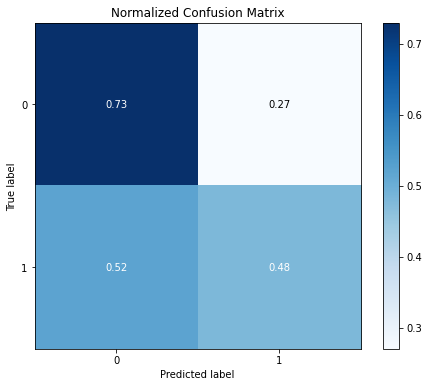

In [63]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

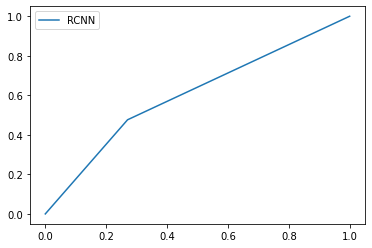

In [64]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='RCNN')
plt.legend()
plt.show()

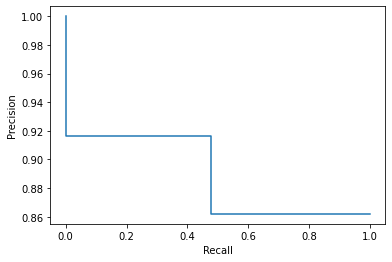

In [65]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### 4.3 Ensemble

In [66]:
cnnlstm_body_member = KerasMember(name="CNN + Bidirectional LSTM Body Model", keras_model=cnnlstm_binary_body_model, train_batches=(body_X_train, y_train), val_batches=(body_X_test, body_y_test))
rcnn_body_member = KerasMember(name="RCNN Body Model", keras_model=rcnn_binary_body_model, train_batches=(body_X_train, y_train), val_batches=(body_X_test, body_y_test))
cnnlstm_face_member = KerasMember(name="CNN + Bidirectional LSTM Face Model", keras_model=cnnlstm_binary_face_model, train_batches=(face_X_train, y_train), val_batches=(face_X_test, face_y_test))
rcnn_face_member = KerasMember(name="RCNN Face Model", keras_model=rcnn_binary_face_model, train_batches=(face_X_train, y_train), val_batches=(face_X_test, face_y_test))

In [67]:
dirichletEnsemble = DirichletEnsemble()
dirichletEnsemble.add_member(cnnlstm_body_member)
dirichletEnsemble.add_member(rcnn_body_member)
dirichletEnsemble.add_member(cnnlstm_face_member)
dirichletEnsemble.add_member(rcnn_face_member)
dirichletEnsemble.fit()

In [68]:
e = dirichletEnsemble.describe()
cnn_auc.append(round(e, 2))
rnn_auc.append(0)

CNN + Bidirectional LSTM Body Model (weight: 0.1265)
RCNN Body Model (weight: 0.0747)
CNN + Bidirectional LSTM Face Model (weight: 0.0538)
RCNN Face Model (weight: 0.7451)
Accuracy: 100.00% - ROC/AUC: 0.74 - Precision: 1.00 - Recall: 1.00 - F1 score: 1.00


## Results

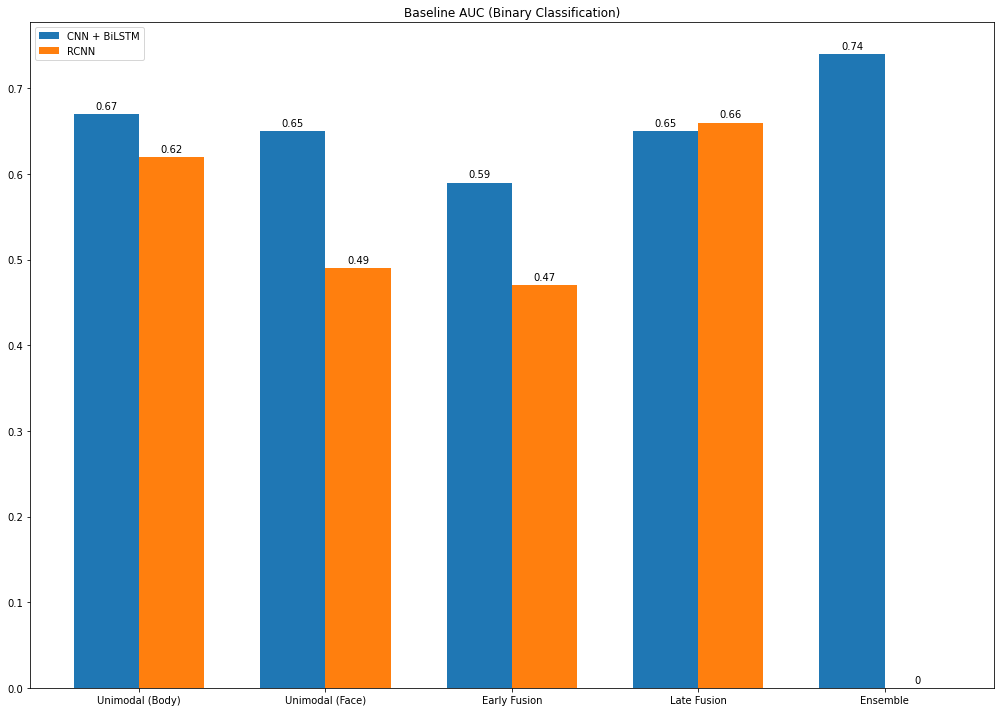

: 

In [69]:
labels = ['Unimodal (Body)', 'Unimodal (Face)', 'Early Fusion', 'Late Fusion', 'Ensemble']

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(14, 10))
rects1 = ax.bar(x - width/2, cnn_auc, width, label='CNN + BiLSTM')
rects2 = ax.bar(x + width/2, rnn_auc, width, label='RCNN')

ax.set_title('Baseline AUC (Binary Classification)')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()